# <center> AML 2203 - Advanced Python AI and ML Tools</center>

# Assignment #1 

# "Clustering on TripAdvisor reviews Restuarant Dataset" 


### Group Members

- Aniketh Vaglapuram C0903304
- Dev Parmar C0908036
- Guruprasad Tandlekar C0902813
- Siddharth Yadav C0907985

# Dataset Description and Specification

For this assignment, we aim to __cluster the reviews given by users to the restaurant__. We will develop clustering models, investigate various word vectorization techniques, and analyze the outcomes. 

We analyze datasets, preprocess them, create unsupervised models, vectorize words, and assess them.

In total, we have a dataset with 676 rows and 5 features.

Features Provided for Each Record:

- __NAME:__ Name of the restaurant (1 to 5 stars).
- __DATE:__ Date on which the review was posted by the user.
- __RATINGS:__ Ratings given by the user out of 50.
- __TITLE:__ Title which was assigned to the review by the user.
- __REVIEWS:__  The actual feedback/review posted for the restaurant by the reviewer.


### Import the necessary libraries for the analysis

In [1]:
# importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import glob
import regex as re
from wordcloud import STOPWORDS, WordCloud
import nltk
import string
import plotly.express as px
import warnings
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster import hierarchy
warnings.filterwarnings('ignore')

__Loading the dataset from the our scraped files__

In [2]:
# We had scraped the reviews for each restaurant in different data files, reading all of them at once
all_files = glob.glob('C:\\Users\\Devjp\\Desktop\\AML Project\\AML Project\\*.csv')
df1 = pd.concat((pd.read_csv(f) for f in all_files))
og = pd.DataFrame(df1)
og = pd.set_option('display.max_colwidth', None)

__Creating a copy for our use__

In [3]:
df = df1.copy()

__Dimension (rows, columns) in the dataset__

In [4]:
df.shape

(676, 5)

__Display the column names__

In [5]:
df.columns

Index(['NAME', 'DATE', 'RATINGS', 'TITLE', 'REVIEWS'], dtype='object')

__Datatypes of each feature of the dataset__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NAME     676 non-null    object
 1   DATE     676 non-null    object
 2   RATINGS  676 non-null    int64 
 3   TITLE    676 non-null    object
 4   REVIEWS  676 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.7+ KB


__Display the first five rows of the dataset__

In [7]:
df.head()

NAME        DATE  RATINGS                             TITLE  \
0  Casa Manila  19-09-2022       40        Danforth location new fave   
1  Casa Manila  19-12-2021       10                Portions too small   
2  Casa Manila  26-05-2021       50  TRY THE DEEP FRIED CHICKEN SKINS   
3  Casa Manila  07-09-2020       10                    Sour Kare-kare   
4  Casa Manila  29-12-2019       40                         Very good   

                                                                                                                                                                                                                                                              REVIEWS  
0  Vegan menu is dope. love the sizzling Tofu love the vegan adobo and Garlic rice that dessert is nice too. Did find the afternoon sunday lunch adobo portion to be small however. Shrinkflation perhaps as cost saving? Calamansi Mojito was nice, refreshing even.  
1                                                            The price is high enough but the portion is unbelievably small and their serving plates are all oversize to give you the impression it's a big order. The taste is questionable of late, maybe new cook?  
2                                                                                                                                                          Saw it on "you gotta eat here" , tried the deep fried chicken skins, amazing with a little salt, very good  
3                        The service was slow, it took ages for our food to come. And the Kare-kare they served us taste sour and smells funky I have the feeling it is spoiled coz my wife had diarhea. When we complained about it they said it taste normal...More  
4                                                                          Decor and tropical ambience is attractive. The food is always good. We sometimes come and have dinner as a large family group...this time was no exception. Everyone left, full and happy.

### Data Exploration

In [8]:
df.REVIEWS = df.REVIEWS.astype('string')
df.TITLE = df.TITLE.astype('string')

In [9]:
df.isnull().sum()

NAME       0
DATE       0
RATINGS    0
TITLE      0
REVIEWS    0
dtype: int64

In [10]:
print(Counter(df.REVIEWS).most_common(10))

[('This is just a McDonalds and I have only gone there for coffee. During McDonalds specialty coffee promotions I have been known to whip into this one. But I find it less convenient than some.', 5), ("We enjoyed an evening with friends here a few nights ago. We were pleasantly surprised at how tasty the dishes were that we ordered. Typical pub fare but a nice menu. Service was friendly. We'll definitely be back.", 5), ('OK, took my son in, we ordered a pizza....I cannot call what came to the table a pizza! Who puts cheddar cheese on a pizza? I sent it back, and we went to A&W instead.....', 5), ('Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!', 5), ("Have been here twice now and always have enjoyed the food. It is 'dated' but then so am i. So I do not mind. Beer is cold food is hot and lots of sports on tv. What more could you need.", 5), ('Inte

In [11]:
df[df['REVIEWS'].str.contains('bad', regex=False)] # checking for the reviews which contain bad in them

NAME        DATE  RATINGS  \
26         Casa Manila  06-11-2016       30   
93         Casa Manila  06-11-2016       30   
94        Spring Sushi  10-07-2015       20   
2   The 3 Monkey's Pub  19-11-2016       10   
13  The 3 Monkey's Pub  19-11-2016       10   
24  The 3 Monkey's Pub  19-11-2016       10   
35  The 3 Monkey's Pub  19-11-2016       10   
46  The 3 Monkey's Pub  19-11-2016       10   
74           El Catrin  23-09-2019       40   

                                                           TITLE  \
26                                                     Expensive   
93                                                     Expensive   
94  By far the worst restaurant I visited on my trip to Toronto.   
2                                                Worst food ever   
13                                               Worst food ever   
24                                               Worst food ever   
35                                               Worst food ever   
46                                               Worst food ever   
74                              Lovely lunch, exceptional decor!   

                                                                                                                                                                                                                                                                                            REVIEWS  
26  Authentic Filipino cuisine, There was confusion with our reservation, rectified very quickly. The good: Authentic Filipino cuisines, fairly tasty, family atmosphere the soup was excellent. The bad: Heavy food, not so good for light night dinner, slow service on Saturday night, expensive  
93  Authentic Filipino cuisine, There was confusion with our reservation, rectified very quickly. The good: Authentic Filipino cuisines, fairly tasty, family atmosphere the soup was excellent. The bad: Heavy food, not so good for light night dinner, slow service on Saturday night, expensive  
94                                                                    Not only did I feel unwell after, I felt like I was badly treated. From the moment I was lead into the restaurant, I asked twice to see if I can sit at the window. The server seemed to have pretended not to hear my...More  
2                                                                                                      Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!  
13                                                                                                     Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!  
24                                                                                                     Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!  
35                                                                                                     Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!  
46                                                                                                     Went in for lunch in october asked for a coke three times it came to me bad ended up drinking water!!!!! Wait staff is nice and polite food not so good!!!! Will never eat there again!!!!!!  
74     It is an experience to visit this restaurant with itâ€™s colourful decor. Obviously Mexican food is served here and certainly done very well. The adobada torta (chicken sandwich) was a good size and delicious with

In [12]:
df[df['REVIEWS'].str.contains('good', regex=False)] # checking for the reviews which contain good in them

NAME        DATE  RATINGS  \
2                 Casa Manila  26-05-2021       50   
4                 Casa Manila  29-12-2019       40   
5                 Casa Manila  23-05-2019       30   
9                 Casa Manila  24-07-2018       50   
14                Casa Manila  14-10-2017       40   
..                        ...         ...      ...   
63  The Chase Fish and Oyster  12-07-2017       40   
64  The Chase Fish and Oyster  10-07-2017       50   
65  The Chase Fish and Oyster  10-07-2017       50   
66  The Chase Fish and Oyster  04-07-2017       40   
67  The Chase Fish and Oyster  01-07-2017       30   

                                TITLE  \
2    TRY THE DEEP FRIED CHICKEN SKINS   
4                           Very good   
5              Interesting experience   
9                 Very friendly owner   
14           Excellent philipino food   
..                                ...   
63                 Seafod restaurant.   
64                 Elegant experience   
65     The best restaurant in Toronto   
66  Thought it was going to be good….   
67              Mohammad welcome trip   

                                                                                                                                                                                                                                                                                                                    REVIEWS  
2                                                                                                                                                                                                                Saw it on "you gotta eat here" , tried the deep fried chicken skins, amazing with a little salt, very good  
4                                                                                                                                Decor and tropical ambience is attractive. The food is always good. We sometimes come and have dinner as a large family group...this time was no exception. Everyone left, full and happy.  
5                                                                          It was quite a fun experience with this Philippino restaurant. We ordered the Kamayan Feast and everything was eaten by hand when the whole table was covered by banana leaves as plate. It’s a good place for fun friends and family gathering.  
9                                                                                                                                                                                                Hosted bday party for my mom, very good food! Owner is very friendly, explain all the food! Over all over good experience!  
14                                                                                                                                                                                    Really good food, good service as well. We came on a Saturday morning and order the combo dinner. On the expensive side but worth it.  
..                                                                                                                                                                                                                                                                                                                      ...  
63                                             We got to the restaurant at 9.00pm on a Thursday after a trip to Niagara and the restaurant was fairly quiet which was understandable with the weekend approaching. The food was certainly good quality and the front of house helpful. The Octopus is recommended as...More  
64  Roof top restaurant. Excellent for upscale business lunches and impressing a dinner date.! Nice bar, outside terrace and comfortable inside elegance, Knowledgeable, good looking staff. A menu that focussed on a few dishes, well prepared and very tasty. Knowledgeable sommelier introduced us to a Sicilian...More  
65                   

In [13]:
df.describe()

RATINGS
count  676.000000
mean    40.488166
std     12.192220
min     10.000000
25%     40.000000
50%     40.000000
75%     50.000000
max     50.000000

In [14]:
# Dropping the duplicate values based on the column: REVIEW and TITLE as there cannot be any duplicate reviews
df.drop_duplicates(subset = ['REVIEWS'], inplace = True)
df.drop_duplicates(subset = ['TITLE'], inplace = True)

### Data Visualization

Text(0, 0.5, 'Count')

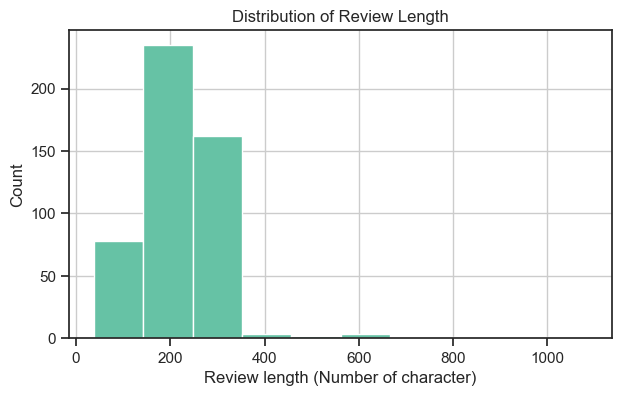

In [15]:
review_length = df.REVIEWS.dropna().map(lambda x: len(x))
sns.set_context(context="talk")
sns.set(palette='Set2', rc={"figure.figsize": (20, 10)}, style="ticks")
plt.figure(figsize=(7, 4))
review_length.loc[review_length<2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

## Distribution of Review Length

This graph shows the distribution of review lengths by number of characters. most of the reviews we have are around 50 to 300 words that is the our graph is left skewed

In [16]:
review_length.skew()

8.545920555484571

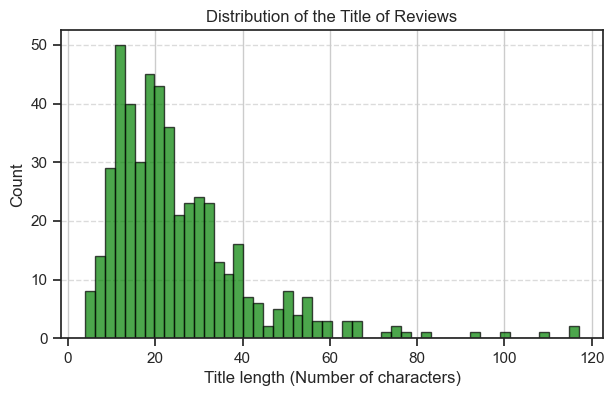

In [17]:
title_length = df.TITLE.dropna().map(lambda x: len(x))

plt.figure(figsize=(7, 4))

title_length.loc[review_length < 1500].hist(bins=50, color='green', edgecolor='black', alpha=0.7)

plt.title("Distribution of the Title of Reviews")
plt.xlabel('Title length (Number of characters)')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This graph shows the distribution of Title lengths by number of characters. most of the reviews we have are around 10 to 60 words.

In [18]:
title_length.skew()

2.102132356541155

In [19]:
# Creating a combined column for both reviews and title
df['combined'] = df['REVIEWS']+" "+ df['TITLE']

In [20]:
df.drop(columns= ['REVIEWS','TITLE'], inplace= True)

In [21]:
#Checking the number of reviews per year with which year had more good reviews
df['DATE'] = pd.to_datetime(df['DATE'])

In [22]:
df['YEAR'] = df['DATE'].dt.year

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 0 to 69
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   NAME      488 non-null    object        
 1   DATE      488 non-null    datetime64[ns]
 2   RATINGS   488 non-null    int64         
 3   combined  488 non-null    string        
 4   YEAR      488 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1), string(1)
memory usage: 21.0+ KB


# PLOTTING REVIEWS BY YEAR

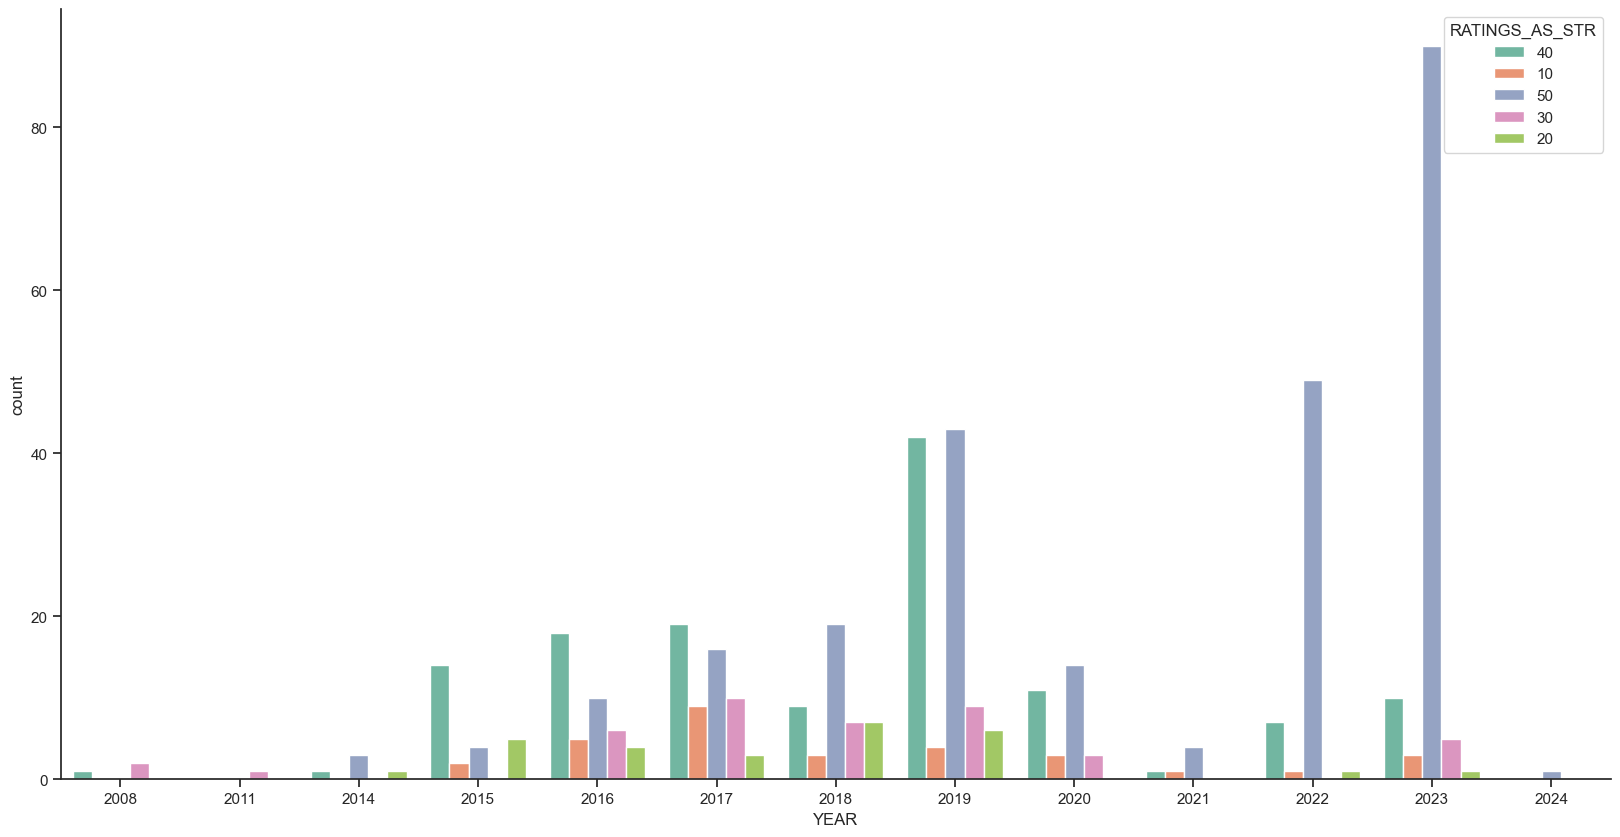

In [24]:
df['RATINGS_AS_STR'] = df['RATINGS'].astype(str)
ax = sns.countplot(x = 'YEAR',hue ='RATINGS_AS_STR', data = df)
sns.despine()

### checking for the number of ratings we have for each value

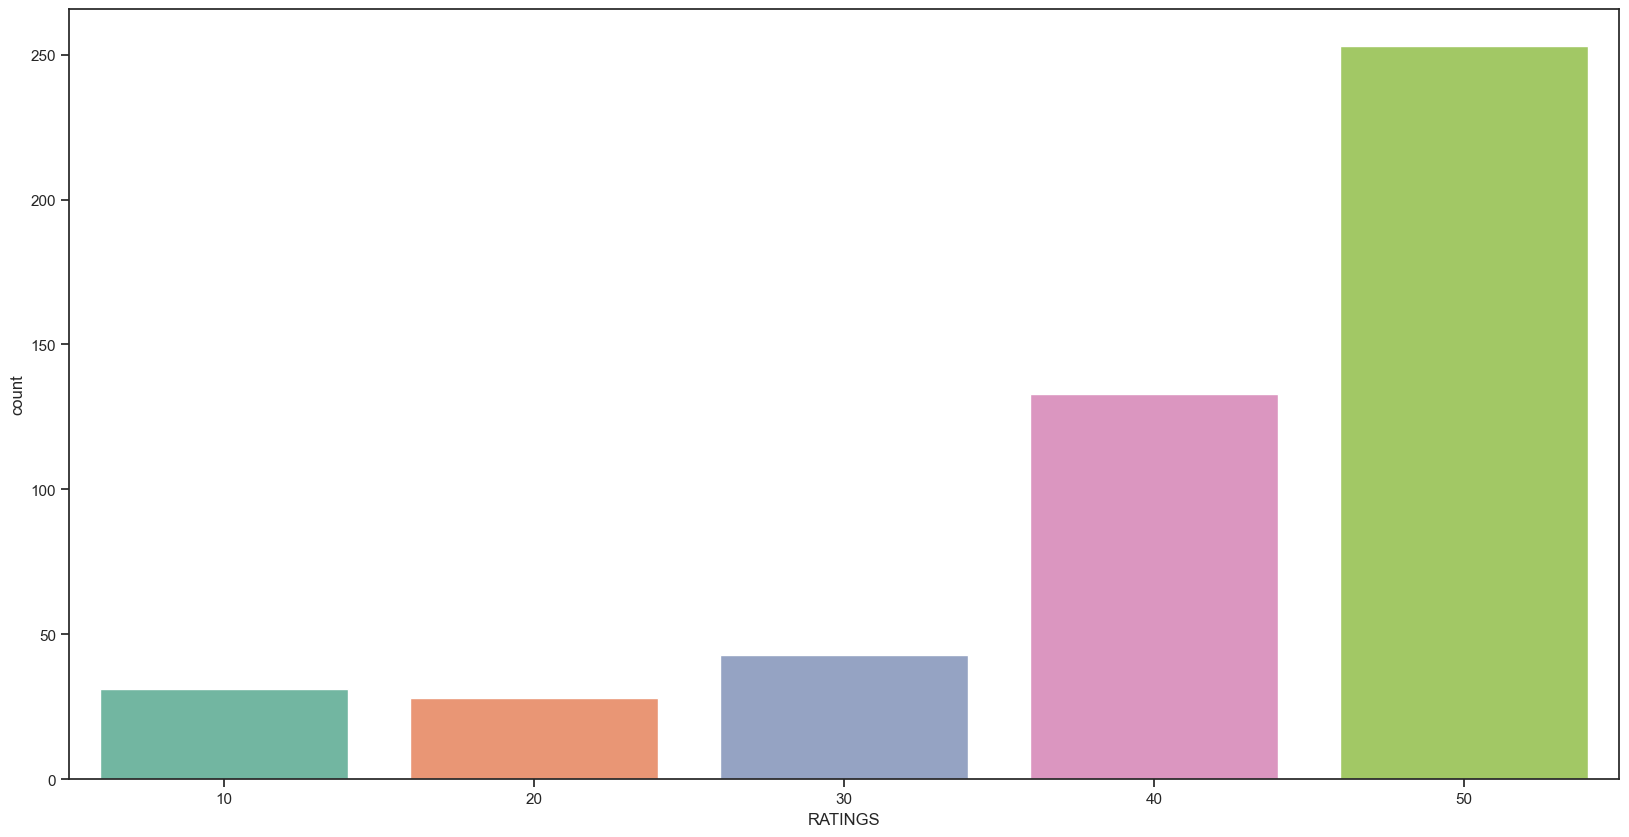

In [25]:
ax = sns.countplot(x = 'RATINGS', data = df)

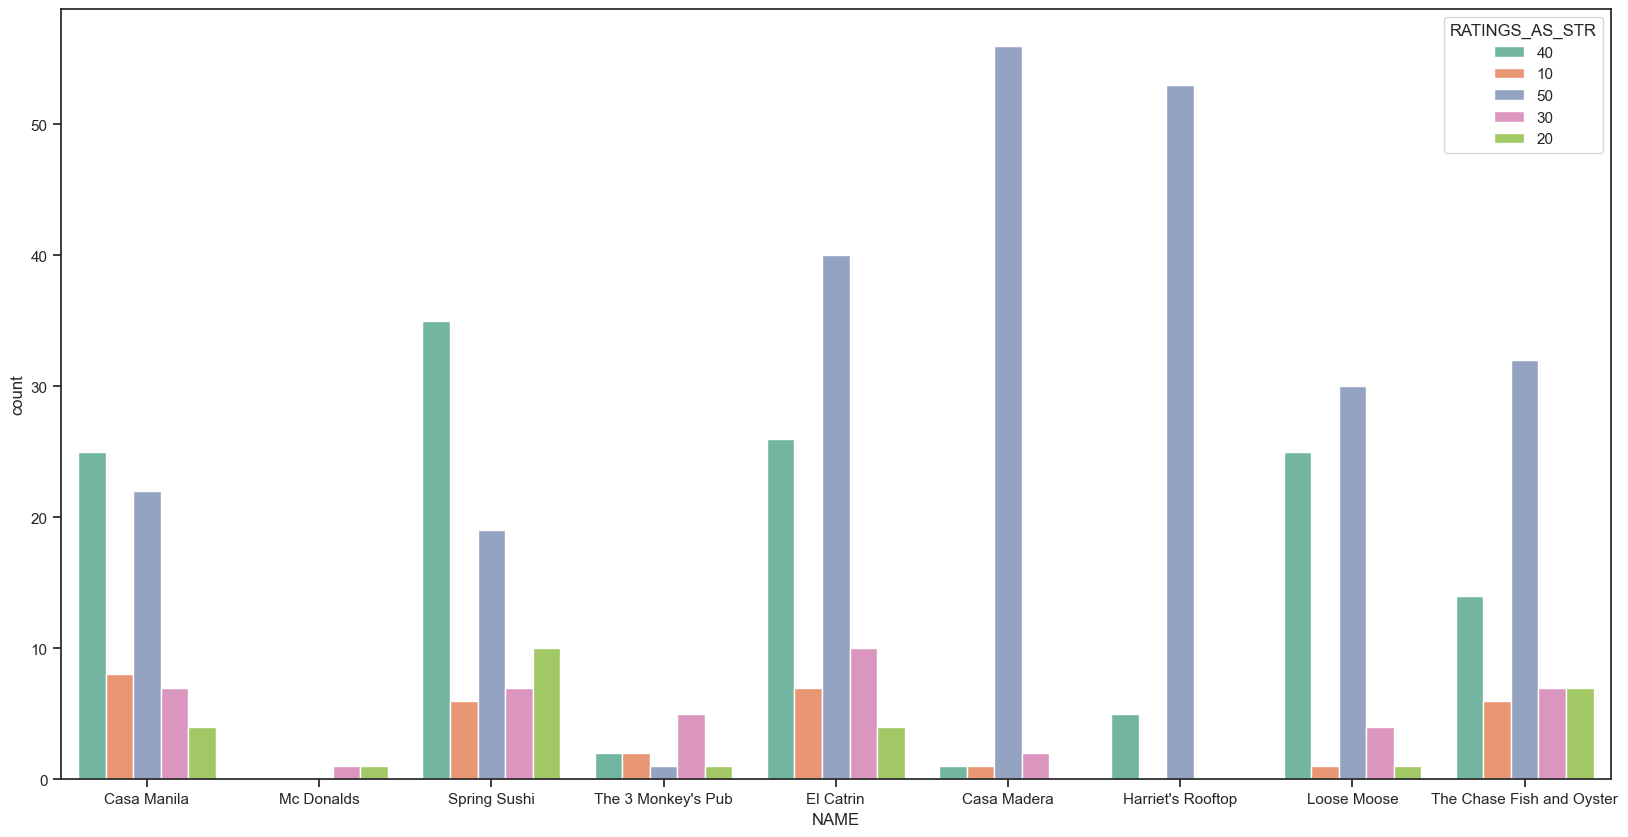

In [26]:
ax = sns.countplot(x = 'NAME', data = df, hue='RATINGS_AS_STR')

### Pandas Profiling

In [27]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("C:\\Users\\Devjp\\Desktop\\AML Project\\AML Project\\pandas_profiling_report.html")

# Creating Functions for Text cleansing:
- Removal of Stop Words.
- Punctuation and Special Characters Removal.
- Lower Case.
- Length of the Text.
- Removing Digits.
- Drop columns
- Lemmatization
- Word Cloud
- Removing Length from words
- Removing meaningless words

### Removed STOP Words

In [28]:
from wordcloud import STOPWORDS
#Function to check stopwords as well as remove them

s_words= list(stopwords.words('english'))
from collections import Counter
c = Counter()

extra_s= ["what", "us", "this","well","there","much","us","and","you're","in","where","when","just","how","is","ha","re","are",
          "hi","aren't", 'couldn','could','couldnt',"couldn't",'did','had','have','must','does','should','was',"it's",
          "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll',"may",'were','is','has','must',
          'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn','realli','now','got','man','people','a',
          'becaus','caus',"one","im","guy","someone","two",'read', "nearby","i","he's","she's","we","it","they","wouldn’t","i've", 'publications', 'publication',
          'aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven', 'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",'writer','review','pages','issue','document']
stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)

def remove_stopwords(df,column,freq):
      df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and word.lower() not in freq ]))

In [29]:
# Function to convert everything to Lower

def to_lower(df, from_column, to_column):
    df[to_column] = df[from_column].apply(lambda x: str(x).lower())
    df.drop(from_column, axis = 1, inplace = True)

In [30]:
#Function to check review length

def to_length(df, from_column, to_column):
    df[to_column] = df[from_column].apply(lambda x: len(str(x)))

In [31]:
#Function to drop unecessary columns

def drop_columns(df, columns):
    for column in columns:
        df.drop(column, axis = 1, inplace = True)

In [32]:
#Function to check and replace punctuation

import string
def punctuator(df,column):
    df[column] = df[column].apply(lambda x: str(x).translate(str.maketrans('', '', string.punctuation)))

In [33]:
#Function to remove digits in between our words

def remove_digits(df,column):
      df[column] = df[column].apply(lambda x: ' '.join(''.join(char if char.isalpha() or char.isspace() else ' ' for char in word) for word in str(x).split()))

In [34]:
#Function to check if the spelling is correct or not 

def remove_meaningless(df, column):
    df[column] = df[column].apply(lambda x: ' '.join([str(TextBlob(word).correct()) for word in x.split()]))

In [35]:
#Function to check alphabet recurring more than twice

def remove_len(df, column):
    p = re.compile(r'(.)\1{2,}')
    df[column] = df[column].apply(lambda x: ' '.join([p.sub(r'\1\1',word) for word in x.split()]))

In [36]:
#Function to remove emojis

import emoji
def remove_emojii(df, column):
    df[column] = df[column].apply(lambda x: ' '.join([emoji.replace_emoji(word, replace='') for word in x.split()]))

### Lemmatization

In [37]:
#Function to lemmatize the words

def lemmatize(df,column):
      df[column] = df[column].apply(lambda x: ' '.join([nltk.WordNetLemmatizer().lemmatize(word) for word in x]))

### Create Wordcloud

In [38]:
#Function to create a Word Cloud

def word_cloud(text):
    stopword_list = set(stop_words)
    word_cloud = WordCloud(width = 550, height = 550,
                           background_color ='black',
                           stopwords = stopword_list,
                           min_font_size = 12).generate_from_text(text)
    plt.figure(figsize = (8, 6))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

### Calling all the functions

In [39]:
punctuator(df, column = 'combined')

In [40]:
remove_digits(df, column = 'combined')

In [41]:
to_length(df=df, from_column='combined', to_column='text_len')

In [42]:
to_lower(df=df, from_column='combined', to_column='review_plus_title')

In [43]:
remove_stopwords(df=df, column ='review_plus_title', freq=[])

In [44]:
remove_emojii(df=df, column ='review_plus_title')

In [45]:
remove_meaningless(df=df, column ='review_plus_title')

In [46]:
remove_len(df=df, column ='review_plus_title')

# Getting the most common words

In [47]:
from collections import Counter
c = Counter()
for txt in df.review_plus_title.values:
    for word in txt.split():
        c[word] += 1
c.most_common(10)

[('food', 336),
 ('service', 237),
 ('restaurant', 123),
 ('amazing', 119),
 ('place', 99),
 ('time', 87),
 ('such', 87),
 ('experience', 86),
 ('nice', 82),
 ('dinner', 81)]

In [48]:
set([w for (w, wc) in c.most_common()[:-29:-1]])

{'approaching',
 'bay',
 'designed',
 'elegance',
 'experiencemore',
 'float',
 'halibut',
 'impressing',
 'knowledgable',
 'lime',
 'lovelymore',
 'lunches',
 'marked',
 'mohammad',
 'move',
 'moving',
 'niagara',
 'opinions',
 'oz',
 'paradise',
 'quiet',
 'requested',
 'respect',
 'roasted',
 'sicilianmore',
 'snapped',
 'understandable',
 'winecocktailspirit'}

In [49]:
mc = c.most_common(10)

In [50]:
df2 = pd.DataFrame(mc,columns=["word","freq"])
df2.head()

word  freq
0        food   336
1     service   237
2  restaurant   123
3     amazing   119
4       place    99

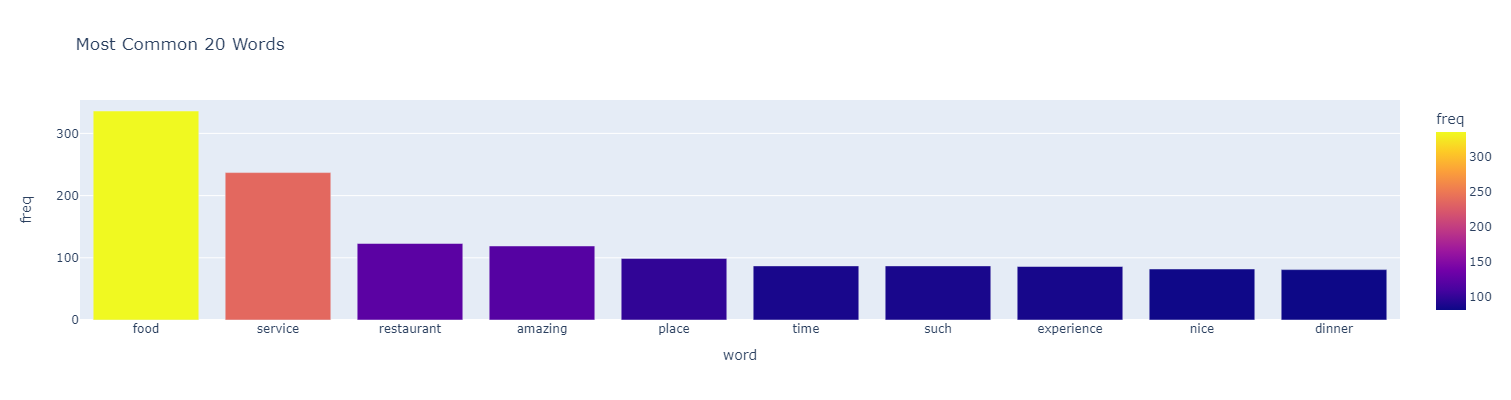

In [51]:
fig = px.bar(df2, x='word', y='freq',
             hover_data=['word', 'freq'], color='freq',
             title='Most Common 20 Words',
             height=400)
fig.show()

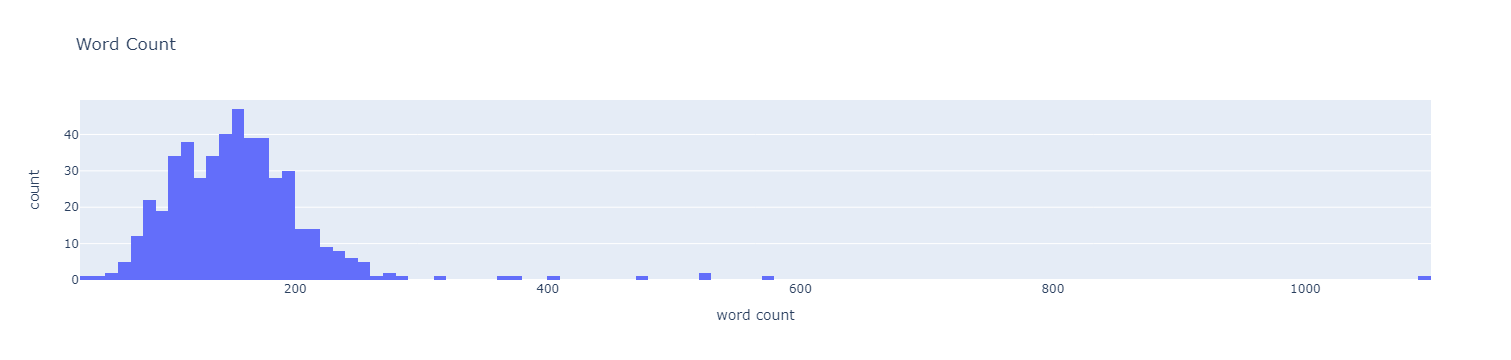

In [52]:
# Visualizing the word count

df["word count"] = df.review_plus_title.str.len()

fig = px.histogram(df, x="word count", nbins=200, title='Word Count')
fig.show()

In [53]:
df["word count"] .skew()

5.7086559627609015

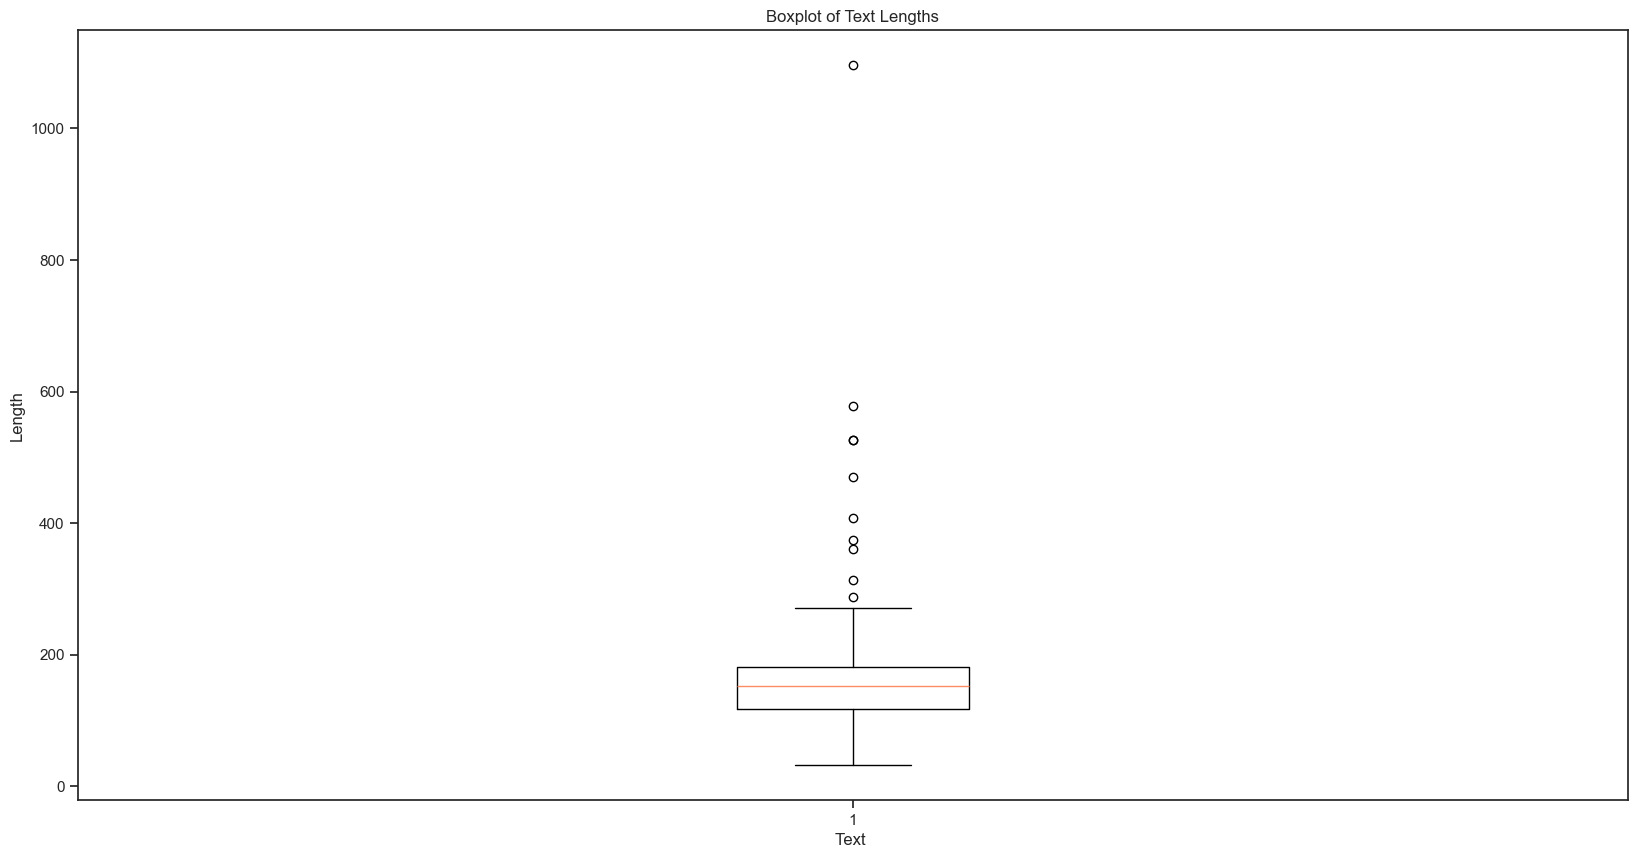

In [54]:
# Checking for outliers depending on Length

plt.boxplot(df['word count'])
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

## Outlier Detection and Removal
Outliers are data points that significantly differ from other observations in a dataset. They can skew statistical analyses and machine learning models, leading to inaccurate results. One method for identifying and removing outliers is the trimming methodsis.

In [55]:
l=df2['word'][:].to_list()

In [56]:
l

['food',
 'service',
 'restaurant',
 'amazing',
 'place',
 'time',
 'such',
 'experience',
 'nice',
 'dinner']

### We will deal with the most frequent words as outliers and remove them

In [57]:
def remove_mostfreq(df,column,freq):
      df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in l and word.lower() not in freq ]))
remove_mostfreq(df=df, column ='review_plus_title', freq=[])

1. Quantile-based Flooring and Capping
* Quantile-based flooring and capping is a method used to handle outliers by setting a threshold based on percentiles (quantiles) of the data and then capping or flooring values beyond this threshold.

In [58]:
w_c = df["word count"]

floor = w_c.quantile(0.01)
cap= w_c.quantile(0.99)
w_capped = np.where(w_c < floor , floor, w_c)
w_capped = np.where(w_c > cap , cap, w_c)

In [59]:
print('Floor: ', floor)
print('Cap: ',cap)

Floor:  63.61
Cap:  416.0599999999997


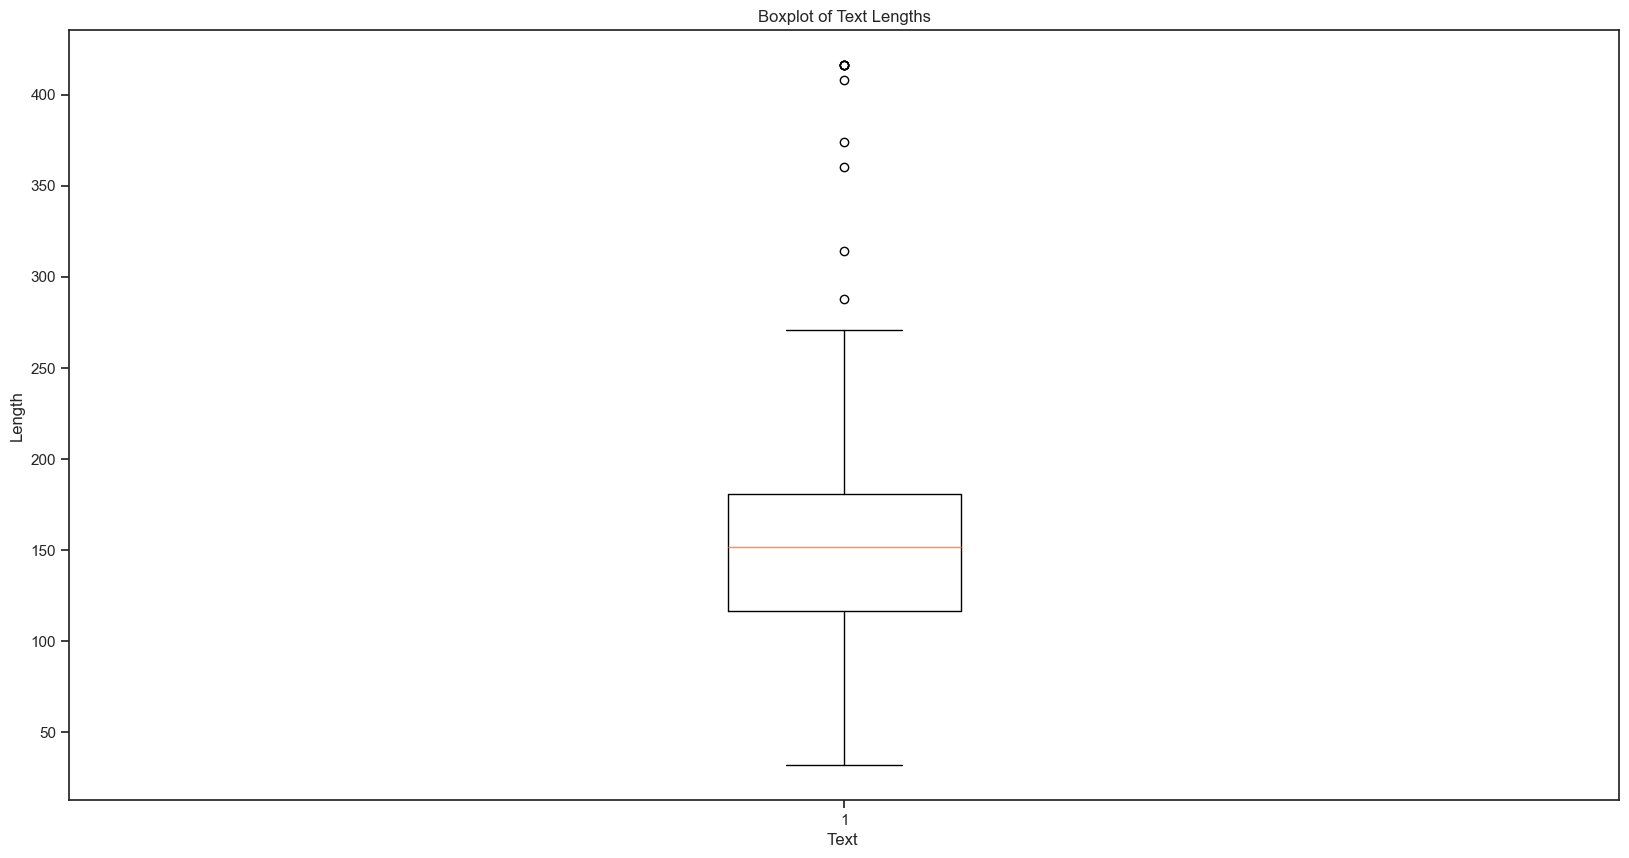

In [60]:
plt.boxplot(w_capped)
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

2. Trimming Method
* The trimming method involves removing a certain proportion of extreme values from both ends of the dataset. This method assumes that the extreme values are outliers and should be disregarded in the analysis.

In [61]:
trim_percentage = 5
lower_trim = np.percentile(w_c, trim_percentage)
upper_trim = np.percentile(w_c, 100 - trim_percentage)
w_trimmed = w_c[(w_c >= lower_trim) & (w_c<= upper_trim)]

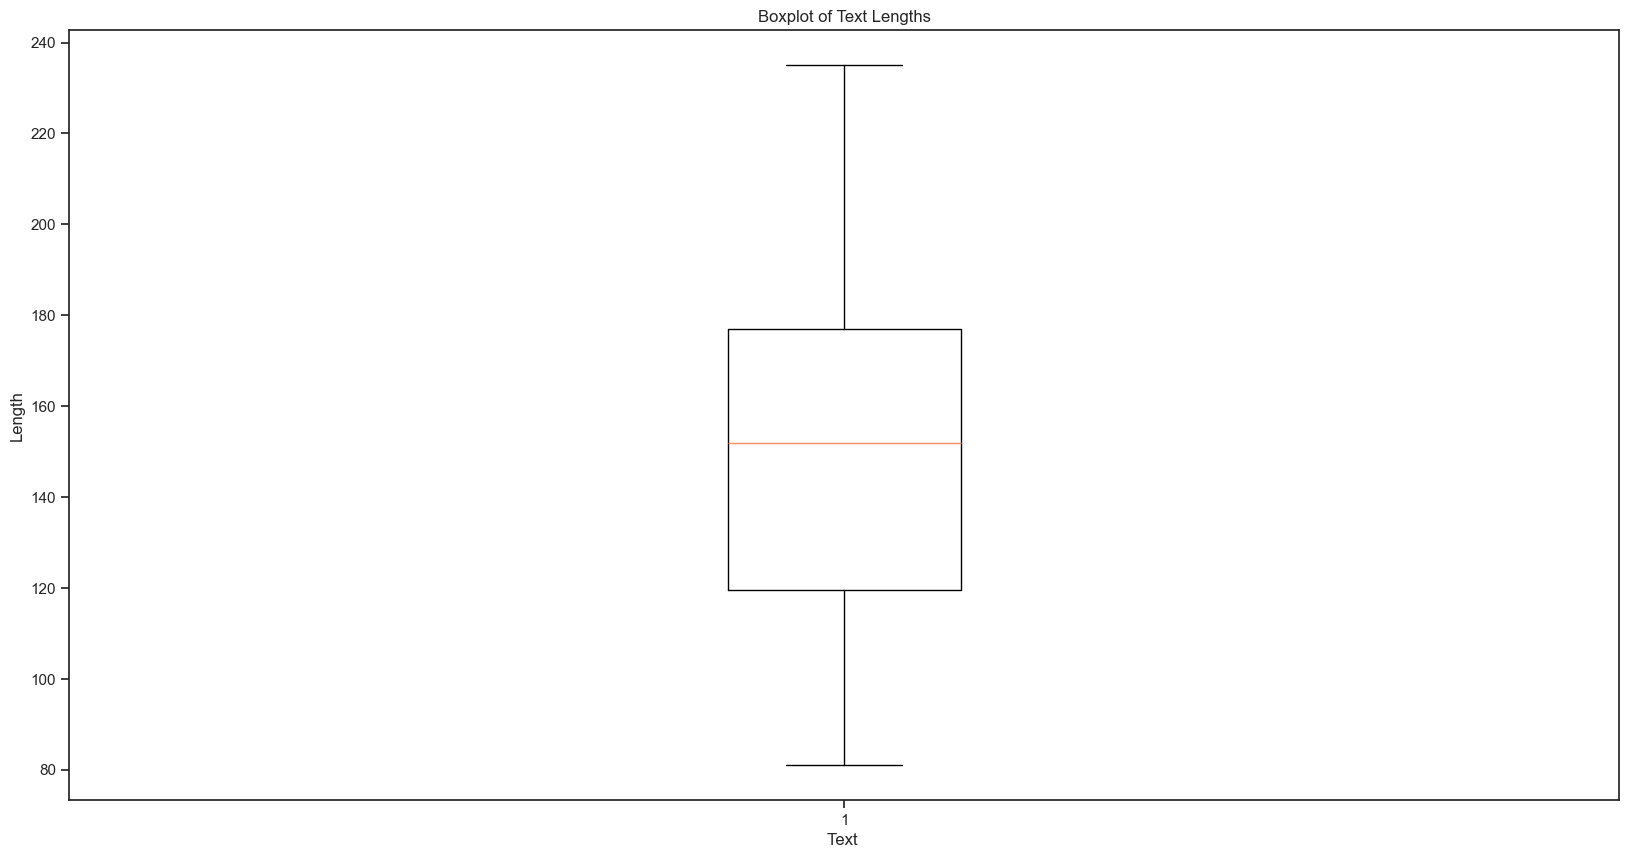

In [62]:
plt.boxplot(w_trimmed)
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

3. Log Transformation
* Log transformation is a method used to transform data by taking the logarithm of each observation. It is commonly applied to handle skewed data distributions and to stabilize variance.

In [63]:
w_log_transformed = np.log(w_c)

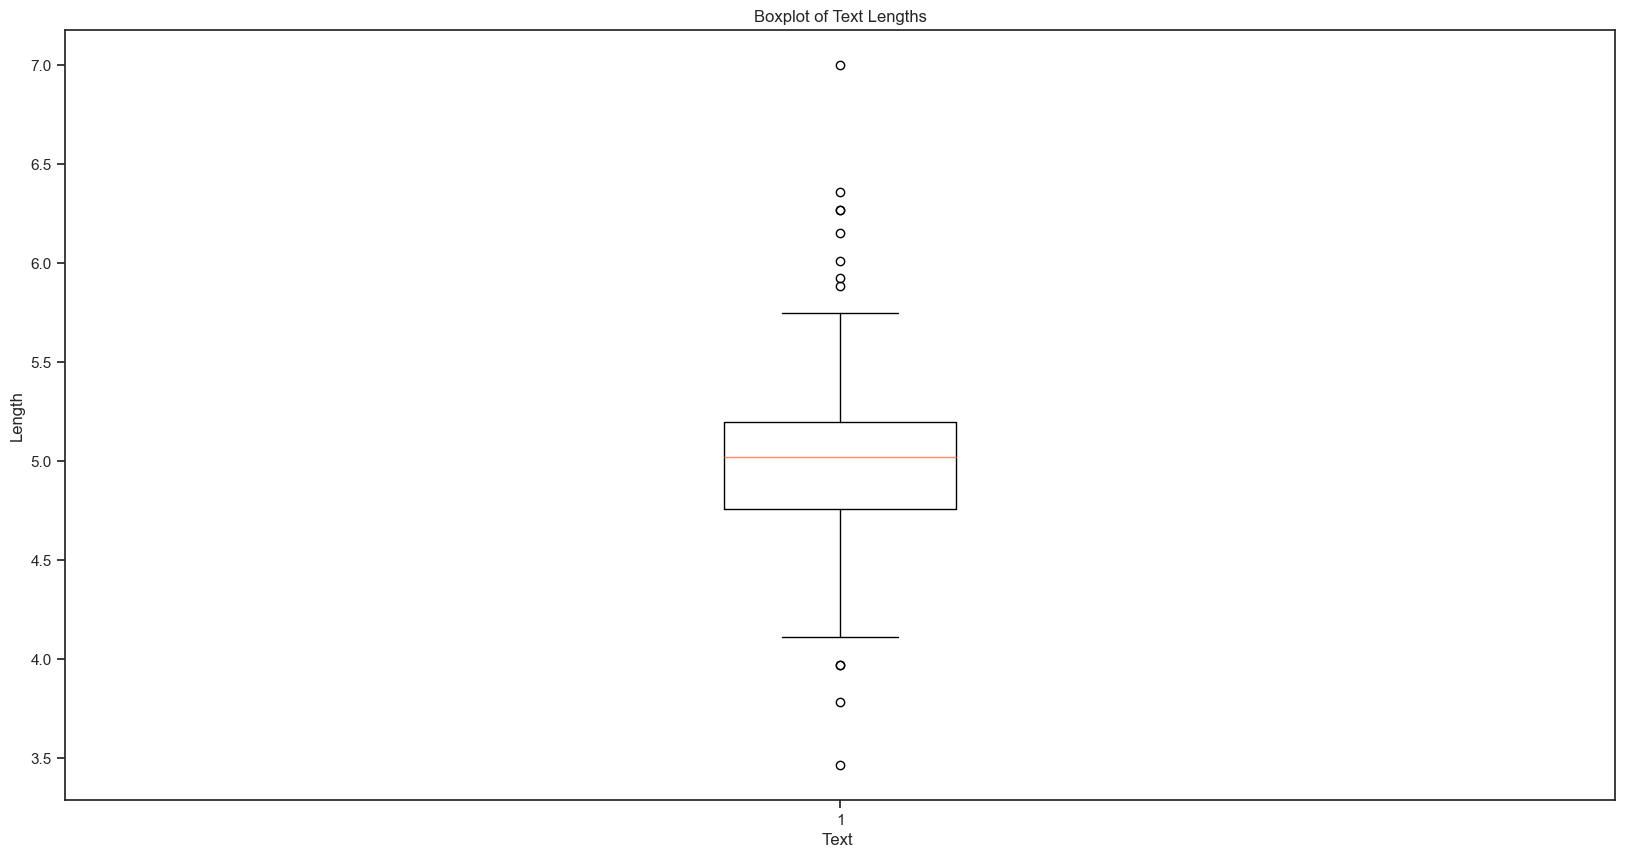

In [64]:
plt.boxplot(w_log_transformed)
plt.title('Boxplot of Text Lengths')
plt.xlabel('Text ')
plt.ylabel('Length')
plt.show()

Upon examination, we found that while employing the three outlier detection methods for the word count, which actually represents the total length of reviews, in order to filter out reviews with minimal or maximal lengths, methods 1 and 3 exhibit outliers. Consequently, we have opted for trimming, which demonstrates a satisfactory distribution and lacks any outliers, unlike the other two methods.

In [65]:
df.shape

(488, 8)

In [66]:
trim_percentage = 5
lower_trim = np.percentile(df['word count'], trim_percentage)
upper_trim = np.percentile(df['word count'], 100 - trim_percentage)
index = df[(df['word count'] <= lower_trim) |(df['word count']>= upper_trim)].index

In [67]:
index.shape

(52,)

In [68]:
df.drop(index, inplace=True)
df.shape

(275, 8)

<Axes: >

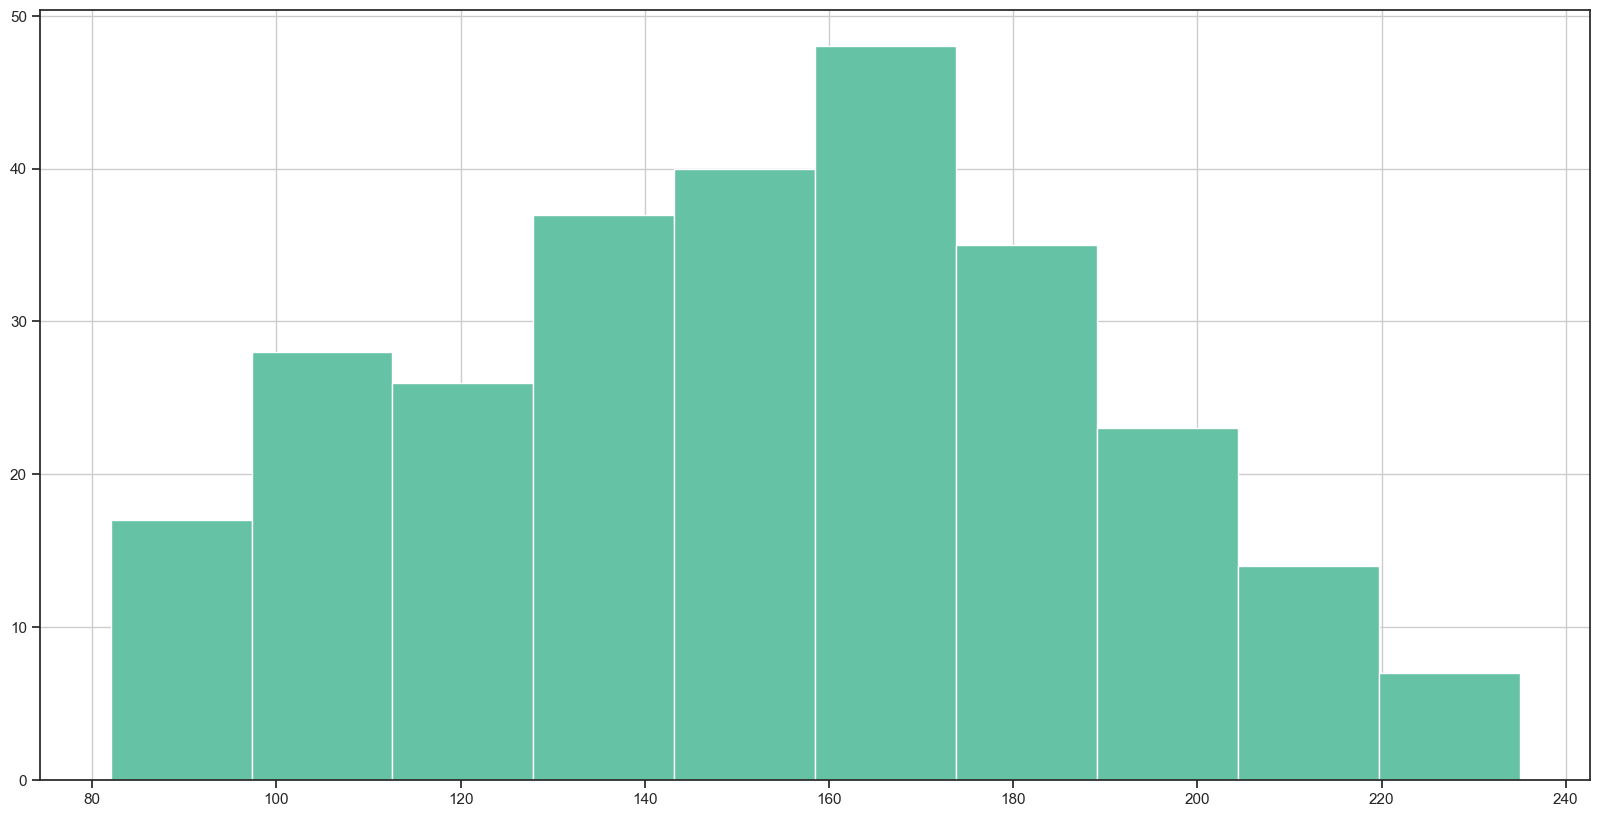

In [69]:
df['word count'].hist()

__The following columns are dropped as to keep the combined column to build our model__

In [70]:
drop_columns(df=df, columns=['NAME', 'DATE', 'RATINGS', 'YEAR', 'RATINGS_AS_STR', 'text_len', 'word count'])

In [71]:
df.columns

Index(['review_plus_title'], dtype='object')

In [72]:
df.head(5)

review_plus_title
1   price high enough portion unbelievably small serving plates overlie give impression big order taste questionable late maybe new cook portions small
4                                      door tropical absence attractive always sometimes come large family groupthis exception everyone left full happy
5     quite fun philippine ordered kamayan feast everything eaten hand whole table covered banana leaves plate fun friends family gathering interesting
13                                                           taste found portions small given amount money paid comb lot plus side lumen freemore mummy
15                      recommend reservations saturday lunch offer buffets decided ordering menu wide variety filipino dishes excellent birthday party

__Tokenization:__ Creating word tokens for each and every words

In [73]:
text_review = df['review_plus_title']
text_review = text_review.dropna()
tokenized_review = text_review.apply(lambda x: word_tokenize(str(x)))

In [74]:
tokenized_review

1                                                   [price, high, enough, portion, unbelievably, small, serving, plates, overlie, give, impression, big, order, taste, questionable, late, maybe, new, cook, portions, small]
4                                                                                            [door, tropical, absence, attractive, always, sometimes, come, large, family, groupthis, exception, everyone, left, full, happy]
5                                                      [quite, fun, philippine, ordered, kamayan, feast, everything, eaten, hand, whole, table, covered, banana, leaves, plate, fun, friends, family, gathering, interesting]
13                                                                                                                 [taste, found, portions, small, given, amount, money, paid, comb, lot, plus, side, lumen, freemore, mummy]
15                                                                           [recommend, reservations, saturday,

In [75]:
len(tokenized_review)

275

__Saving it to our DF by creating a new column called Tokenized_review__

In [76]:
df['tokenized_review']= tokenized_review

In [77]:
lemmatize(df=df, column = 'tokenized_review')

In [78]:
drop_columns(df=df, columns=['review_plus_title'])

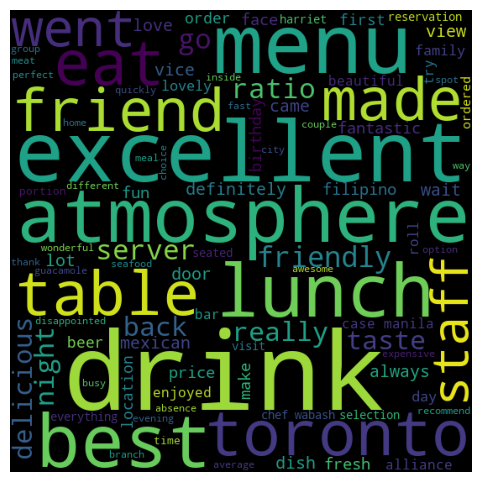

In [79]:
paragraph=' '.join(df.tokenized_review.tolist())
word_cloud(paragraph)

## Methods we used to convert text into vector

Bag of Words




TF-IDFdf

In [80]:
# truncated SVD for dimesionality reduction for 100 dimensions
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50,n_iter=10)

### 1. Bag of Words (BoW)

In [81]:
bow_vect = CountVectorizer().fit_transform(df['tokenized_review'])

In [82]:
bow_vect.shape

(275, 1709)

In [83]:
bow_data=svd.fit_transform(bow_vect)

In [84]:
from sklearn.preprocessing import StandardScaler
bow = StandardScaler(with_mean=False).fit_transform(bow_data)
print("bow :",bow.shape)

bow : (275, 50)


### 2.TF-IDF

In [85]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2)).fit_transform(df['tokenized_review'])

In [86]:
tfidf_vect.get_shape()

(275, 6331)

In [87]:
tfidf_data=svd.fit_transform(tfidf_vect)

In [88]:
tfidf = StandardScaler(with_mean=False).fit_transform(tfidf_data)
print("tfidf :",tfidf.shape)

tfidf : (275, 50)


# Clustering
Clustering is a technique used to group similar objects or data points together based on certain characteristics or features. Two commonly used clustering algorithms are K-Means clustering and Hierarchical Clustering.

* K-Means clustering
* Hierarchical Clustering

# K-Means Clustering
K-Means clustering is an iterative algorithm that partitions data into K clusters. It aims to minimize the within-cluster variance by iteratively assigning data points to the nearest cluster centroid and updating the centroid's position.

In [89]:
# Cluster range
cluster_range=list(range(2,16))

In [90]:
optimal_score_bow = []
    
for i in tqdm(range(len(cluster_range))):
    kmeans = KMeans(n_clusters = cluster_range[i],random_state=1).fit(bow)
    optimal_score_bow.append(kmeans.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 65.57it/s]


In [91]:
Optimal_cluster_bow = np.argmin(optimal_score_bow) + 2 
print("The optimal number of clusters == ", Optimal_cluster_bow)
print("The loss for optimal cluster is ==  ", min(optimal_score_bow))

The optimal number of clusters ==  15
The loss for optimal cluster is ==   11214.931044733019


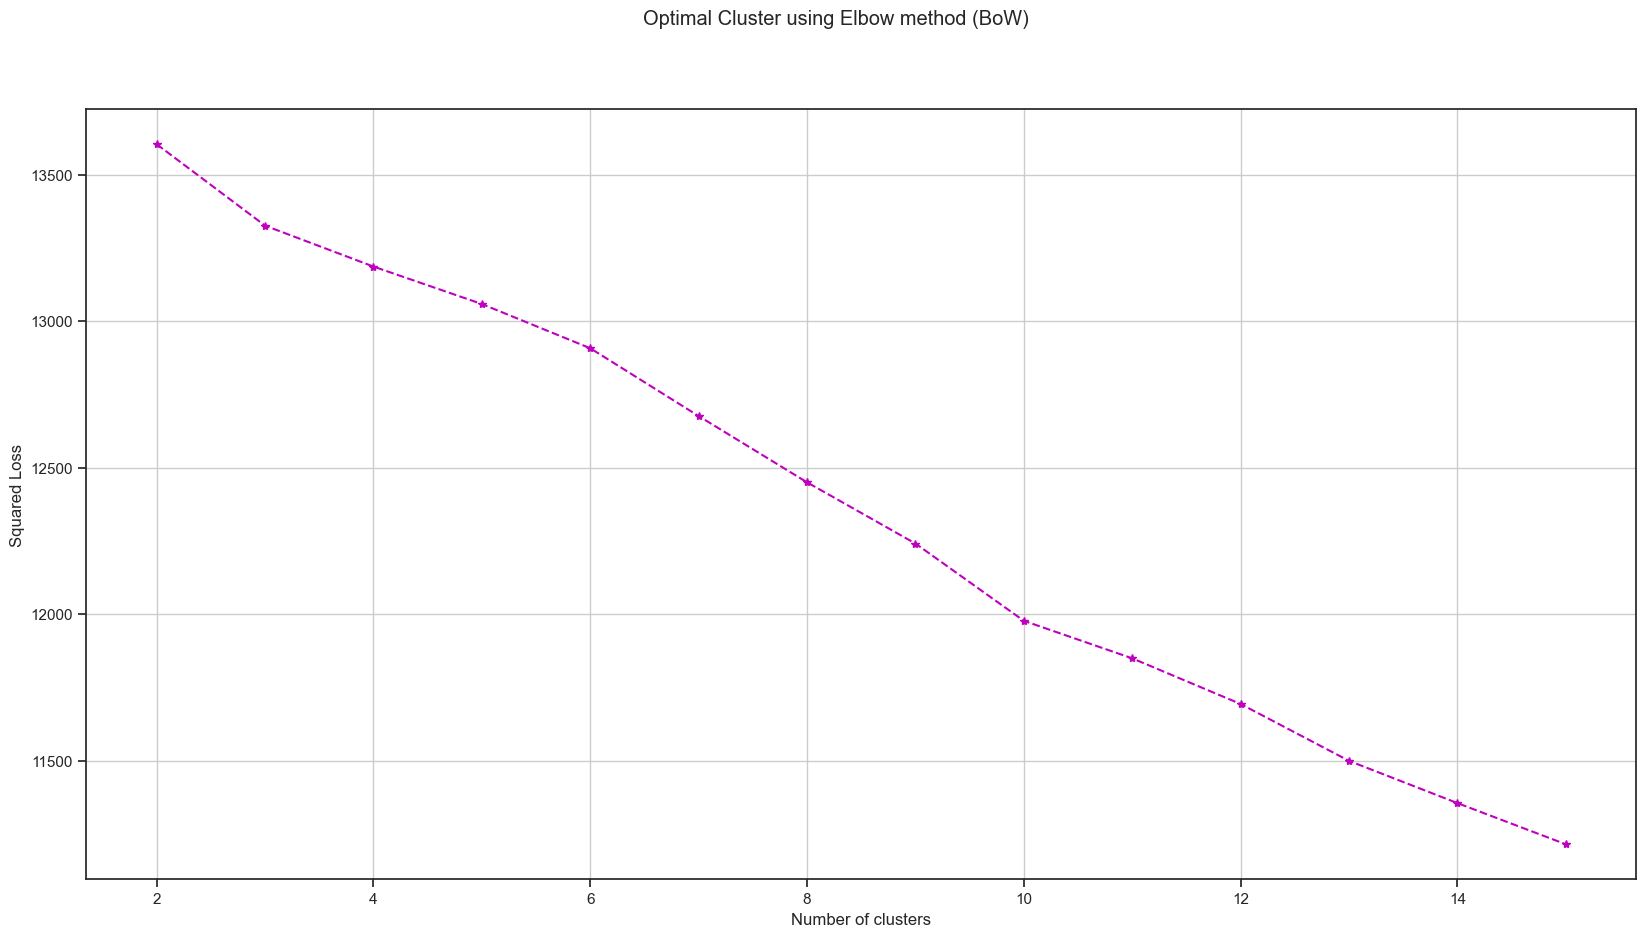

In [92]:
plt.suptitle('Optimal Cluster using Elbow method (BoW)')       
plt.plot(cluster_range, optimal_score_bow,'m*',linestyle='dashed')
plt.xlabel("Number of clusters")
plt.ylabel("Squared Loss")
plt.grid()
plt.show()

In [93]:
optimal_score_tfidf = []
    
for i in tqdm(range(len(cluster_range))):
    kmeans = KMeans(n_clusters = cluster_range[i],random_state=1).fit(tfidf)
    optimal_score_tfidf.append(kmeans.inertia_)

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 187.88it/s]


In [94]:
Optimal_cluster_tfidf = np.argmin(optimal_score_tfidf) + 2 
print("The optimal number of clusters == ", Optimal_cluster_tfidf)
print("The loss for optimal cluster is ==  ", min(optimal_score_tfidf))

The optimal number of clusters ==  15
The loss for optimal cluster is ==   11287.019794465445


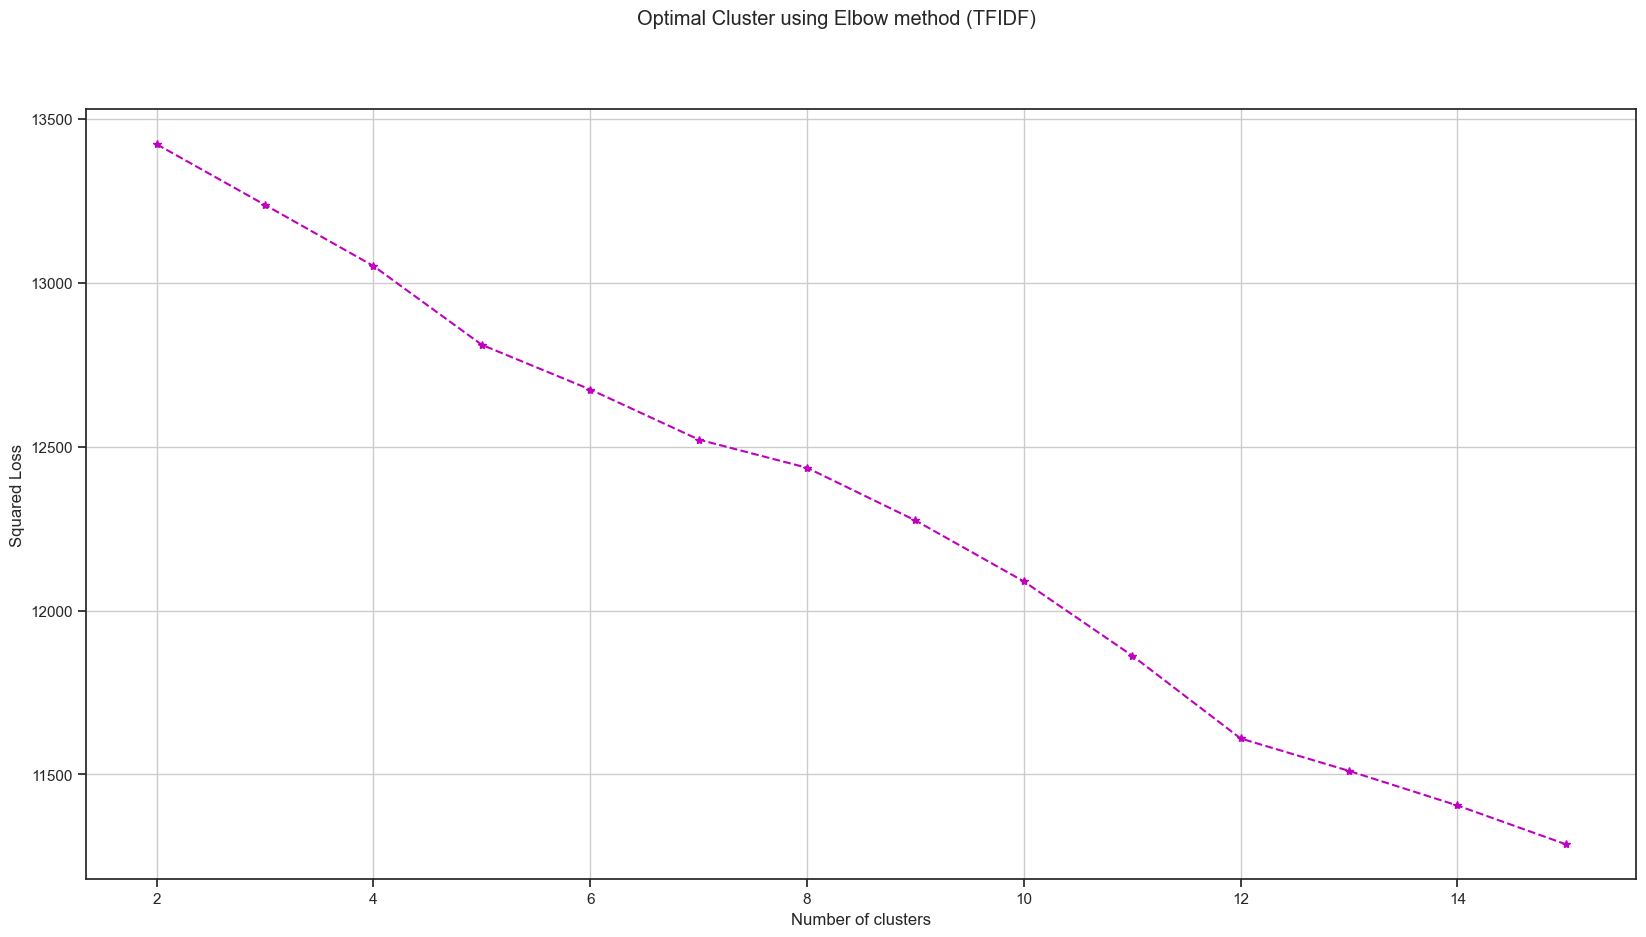

In [95]:
plt.suptitle('Optimal Cluster using Elbow method (TFIDF)')       
plt.plot(cluster_range, optimal_score_tfidf,'m*',linestyle='dashed')
plt.xlabel("Number of clusters")
plt.ylabel("Squared Loss")
plt.grid()
plt.show()

In [96]:
kmeans_bow = KMeans(n_clusters=15, random_state=1).fit(bow)
kmeans_tfidf= KMeans(n_clusters=15, random_state=1).fit(tfidf)

In [97]:
y = np.array(df['tokenized_review'])

__Bag of Words__ is a technique used in natural language processing (NLP) to represent text data in a numerical format. It involves creating a vocabulary of unique words present in the corpus and representing each document as a vector indicating the frequency of each word in the vocabulary.

In [98]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(kmeans_bow.labels_.shape[0]):
    if kmeans_bow.labels_[i] == 0:
        cluster1.append(y[i])
    elif kmeans_bow.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [99]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-15 : ",len(cluster15))

No. of reviews in Cluster-1 :  14

No. of reviews in Cluster-15 :  2


In [100]:
# Reviews for cluster 1
for i in range(1):
    print('Review: ', cluster1[i])

Review:  made reservation summerlicious still needed wait minute door acknowledged staff member seated quickly empty table waitresshostess placed venus table leftmore poor worse


In [101]:
# Reviews for cluster 15
for i in range(2):
    print('Review: ', cluster15[i])

Review:  friend originally philippine came warm gracious welcome disappoint enjoyed fried latter dessert halo halo filipino beer san miguelnot fun trying philippine first filipino restraint
Review:  lunch family friend california friend wanted typical filipino reason took often eat fried milkfish rising lying halo halo lech plan kinilaw dont kinilaw though more filipino


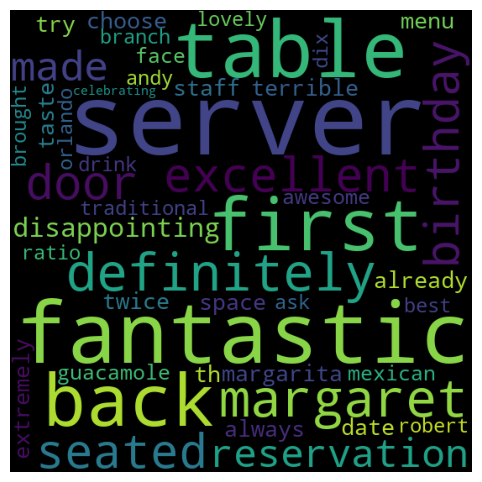

In [102]:
# Wordcloud for review 1

c1 =' '.join(cluster1)
word_cloud(c1)

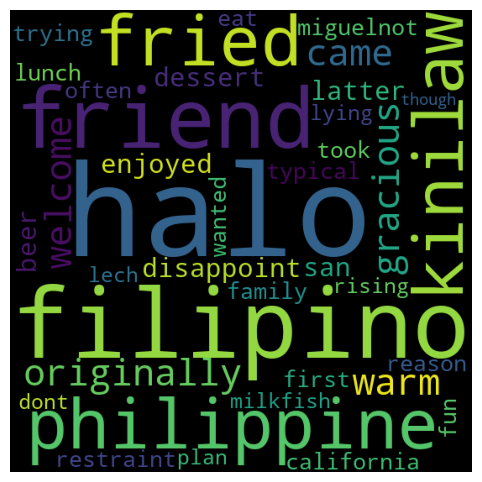

In [103]:
# Wordcloud for review 1

c15 = ' '.join(cluster15)
word_cloud(c15)

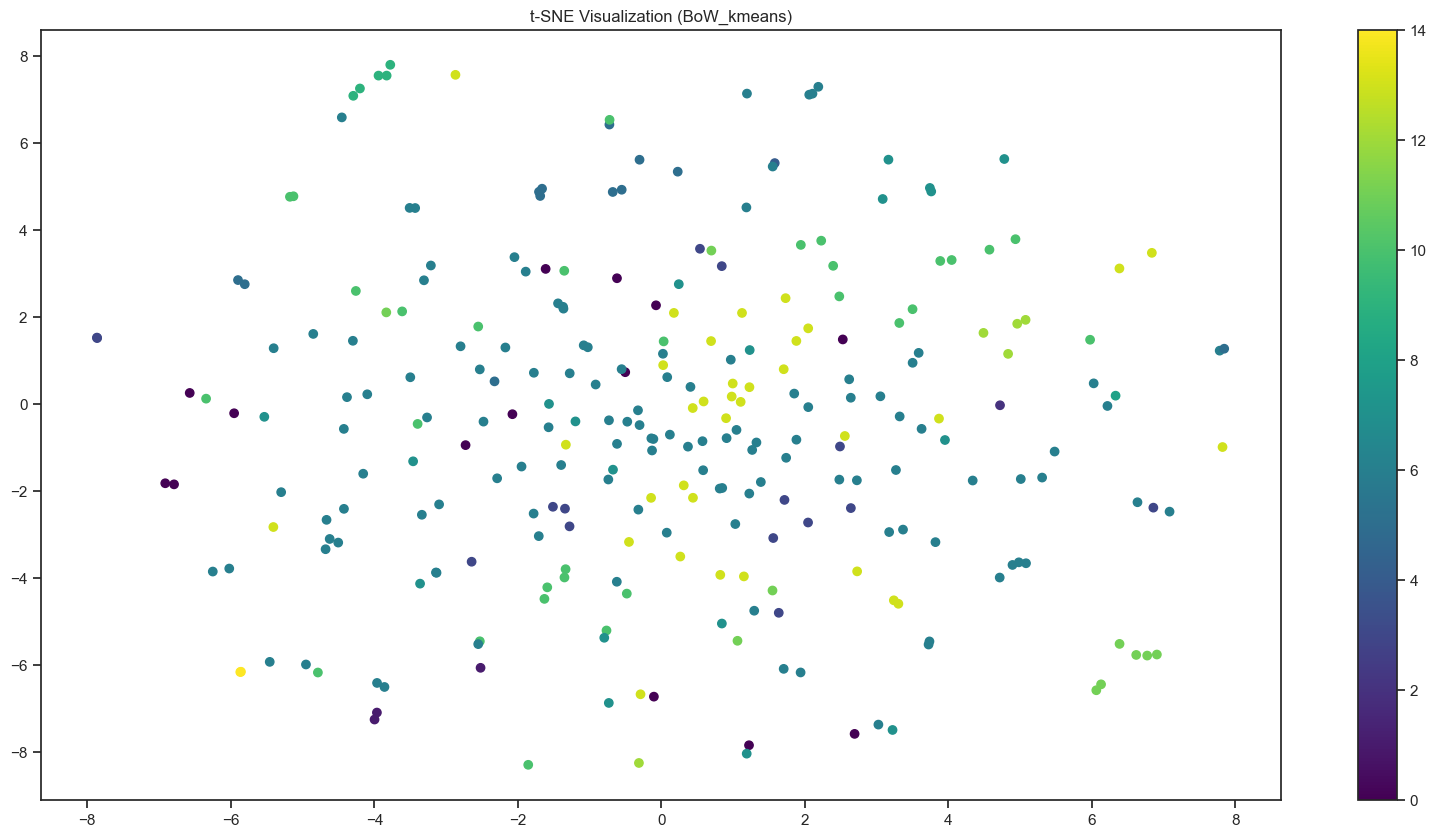

In [104]:
from sklearn.manifold import TSNE

# Visualize clusters using t-SNE
tsne = TSNE(n_components=2, random_state=1)
tsne_results = tsne.fit_transform(bow)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_bow.labels_, cmap='viridis')
plt.title('t-SNE Visualization (BoW_kmeans)')
plt.colorbar()
plt.show()

In [105]:
from sklearn.metrics import silhouette_score
silhouette_score_bow = silhouette_score(bow, kmeans_bow.labels_)
print("Silhouette Score (BoW_kmeans):", silhouette_score_bow)

Silhouette Score (BoW_kmeans): 0.021014077732904875


## Silhouette Score Analysis
### Bag of Words (BoW) Representation
- **Silhouette Score (BoW_kmeans):** 0.021014077732904875
  - **Interpretation:** The Silhouette Score for the clustering obtained using K-Means on Bag of Words (BoW) representation is approximately 0.021.
  - **Explanation:** 
    - A Silhouette Score ranges from -1 to 1.
    - Values close to 1 indicate that the clusters are well-separated.
    - Values close to 0 suggest overlapping clusters.
    - Negative values indicate that data points have been assigned to the wrong cluster.
  - **Evaluation:** 
    - A score of 0.021 is relatively low, suggesting that the clusters are not well-separated.
    - It indicates that there might be some overlap between clusters or that the clustering algorithm did not perform optimally.


# TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF is a numerical statistic used in natural language processing to evaluate the importance of a word in a document relative to a collection of documents. It combines two metrics: term frequency (TF) and inverse document frequency (IDF).

In [106]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(kmeans_tfidf.labels_.shape[0]):
    if kmeans_tfidf.labels_[i] == 0:
        cluster1.append(y[i])
    elif kmeans_tfidf.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [107]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-15 : ",len(cluster15))

No. of reviews in Cluster-1 :  12

No. of reviews in Cluster-15 :  5


In [108]:
# Reviews for cluster 1
for i in range(2):
    print('Review: ', cluster1[i])

Review:  probably inappropriate title came first mind called made reservation seated minute looking menu placed order noticed warm therefore tropical weather included
Review:  choose first date decision leave certain private function schedule already hour polite more first filipino first date


In [109]:
# Reviews for cluster 15
for i in range(2):
    print('Review: ', cluster15[i])

Review:  excellent came fast everything tasted excellent location highly recommend sitting rooftop ratio day tip make reservation rooftop ratio view
Review:  excellent vice drink sit ratio summer evening string light sky beautiful especially ratio


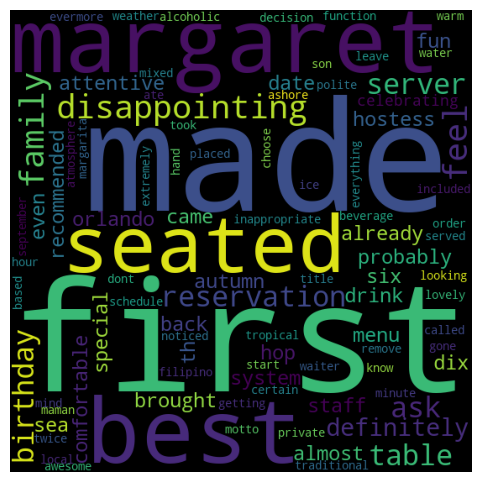

In [110]:
# Wordcloud for review 1
c1 =' '.join(cluster1)
word_cloud(c1)

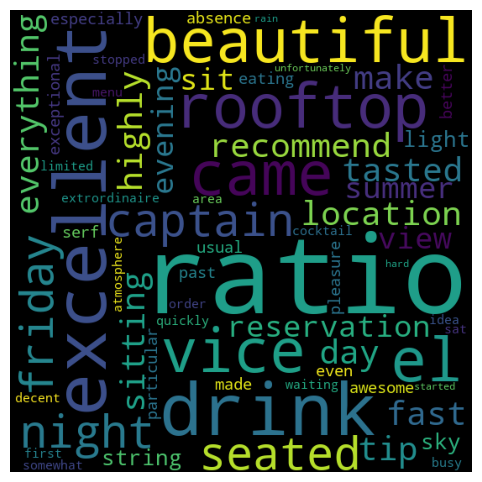

In [111]:
# Wordcloud for review 1
c15 = ' '.join(cluster15)
word_cloud(c15)

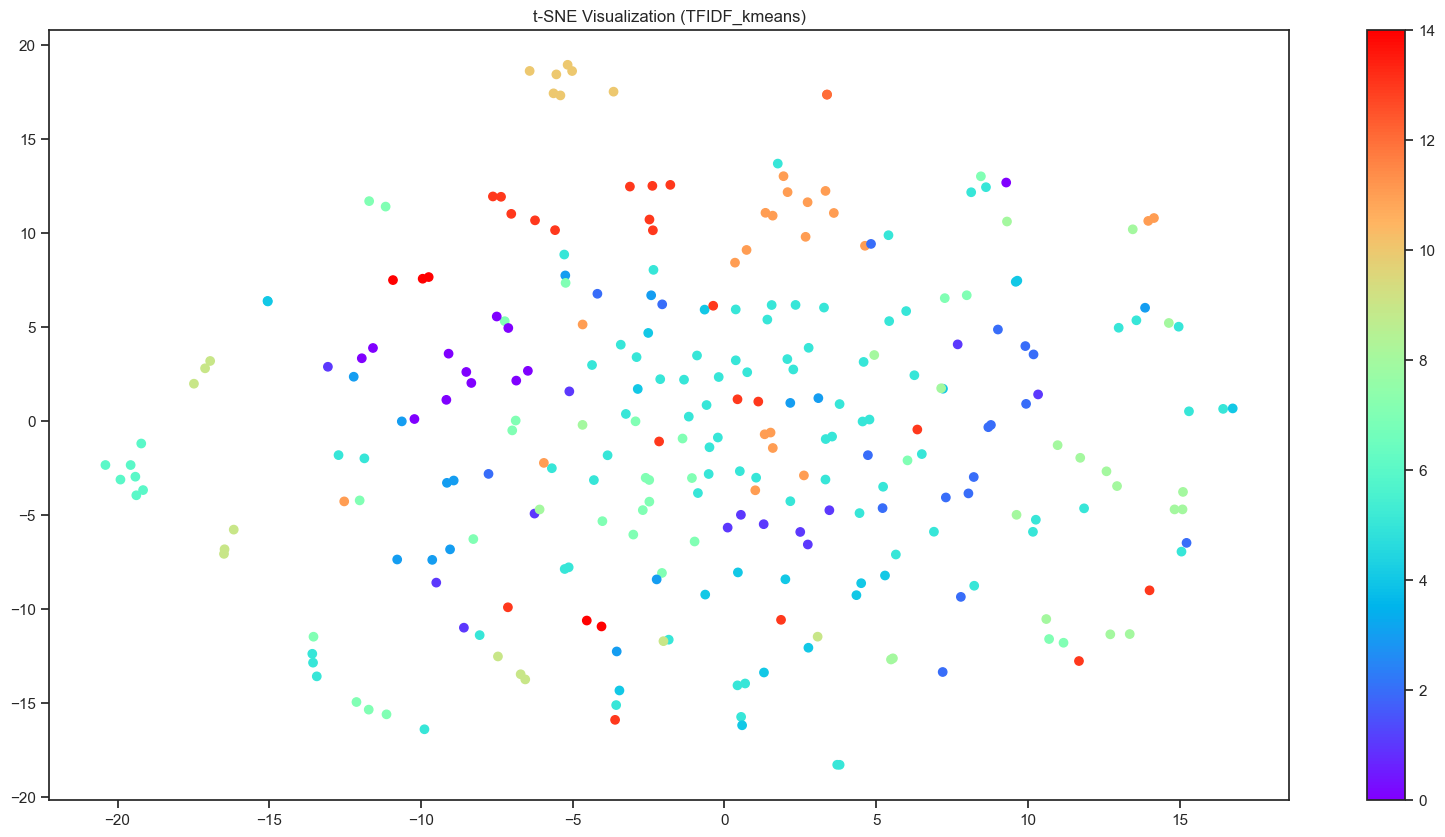

In [112]:
# Visualize clusters using t-SNE
tsne_results = tsne.fit_transform(tfidf)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_tfidf.labels_, cmap='rainbow')
plt.title('t-SNE Visualization (TFIDF_kmeans)')
plt.colorbar()
plt.show()

In [113]:
from sklearn.metrics import silhouette_score
silhouette_score_tfidf = silhouette_score(tfidf, kmeans_tfidf.labels_)
print("Silhouette Score (TFIDF):", silhouette_score_tfidf)

Silhouette Score (TFIDF): 0.04127434275248862


## Silhouette Score Analysis
### TF-IDF Representation
- **Silhouette Score (TFIDF):** 0.04127434275248862
  - **Interpretation:** The Silhouette Score for the clustering obtained using K-Means on TF-IDF representation is approximately 0.041.
  - **Explanation:** 
    - Similar to the previous score, this one also ranges from -1 to 1.
    - Higher values indicate better separation between clusters.
  - **Evaluation:** 
    - A score of 0.041 is slightly higher than the BoW score.
    - It suggests that the clusters might be slightly better separated compared to the BoW representation.
    - However, it's still a relatively low score, indicating that there is room for improvement in the clustering results.


# 2.Hierarchical Clustering
Hierarchical clustering is a method where data points are grouped into a hierarchy of clusters. It can be agglomerative (bottom-up) or divisive (top-down). In agglomerative clustering, each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

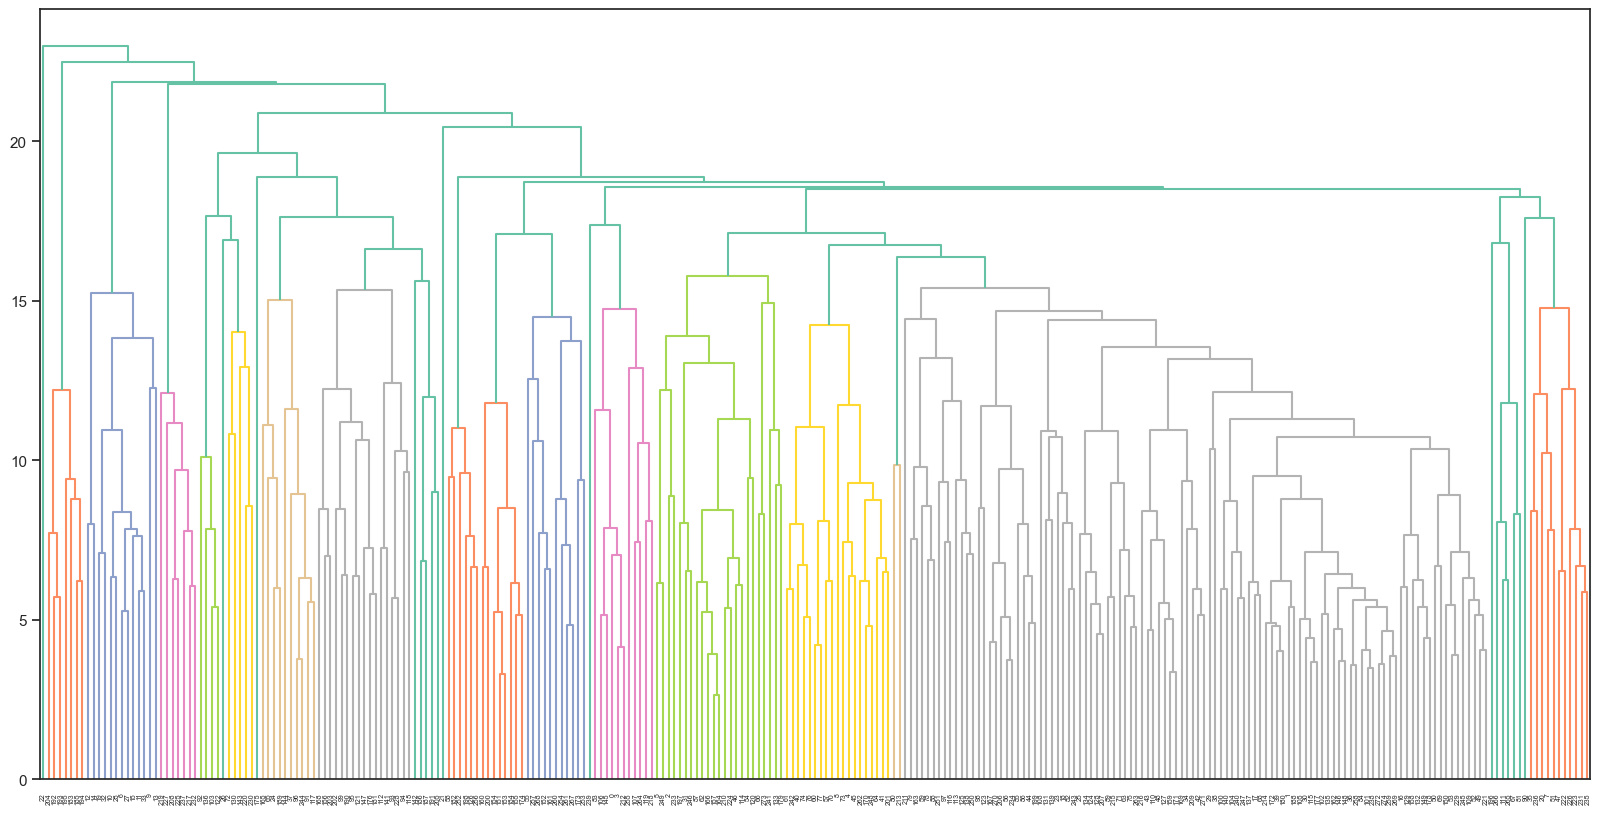

In [114]:
dendro=hierarchy.dendrogram(hierarchy.linkage(bow,method='ward'))

In [115]:
agg_bow = AgglomerativeClustering(n_clusters=15)
agg_bow.fit(bow)

AgglomerativeClustering(n_clusters=15)

In [116]:
agg_bow.labels_

array([ 2,  5,  5,  2,  5,  5,  3,  1,  5,  3,  3,  3,  3,  3,  3,  3,  5,
        5,  5,  3,  1, 13,  7,  5,  0,  5, 12,  3,  3,  5,  5,  5,  3,  3,
        5,  1,  5,  0,  5,  5,  5,  5,  5,  5,  5,  5,  5,  1,  5,  5,  5,
        1,  5,  5,  5,  4,  5,  5,  9,  5,  5,  5,  5,  5,  5,  0,  5,  6,
        5,  5,  5,  5, 12,  5,  5,  5,  5,  5,  5,  5,  5,  6,  5,  2,  5,
        5,  5,  5,  5,  5,  1,  0, 14,  0,  0,  0,  0,  5,  5,  0,  5,  5,
        5, 14,  5,  5,  2,  2,  5,  5,  5,  6,  0,  5,  5,  5,  5,  0,  0,
        2,  5,  0, 14,  5,  5,  5,  9,  5,  5,  5, 12,  5,  5,  5,  5,  5,
       14,  5,  5,  5,  5,  0,  0, 12,  0,  2,  5,  0,  5,  5,  5,  4,  4,
        4,  4,  4,  0,  5,  5,  5,  4,  4,  5,  5,  5,  0,  5,  5,  0,  5,
        5,  5,  5,  4,  4,  8,  0,  5,  5,  5,  5,  0,  9, 11,  4, 11,  0,
        0,  5,  0,  0,  0, 11, 11, 11, 11,  6,  5,  9,  5,  4,  5,  0,  0,
       11,  0,  5,  5, 10,  5,  5,  5,  2,  5,  5,  5,  5, 10,  2, 10, 12,
        5,  1,  1,  5, 10

In [117]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(agg_bow.labels_.shape[0]):
    if agg_bow.labels_[i] == 0:
        cluster1.append(y[i])
    elif agg_bow.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [118]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-15 : ",len(cluster15))

No. of reviews in Cluster-1 :  32

No. of reviews in Cluster-15 :  4


__Wordcloud for review 1__

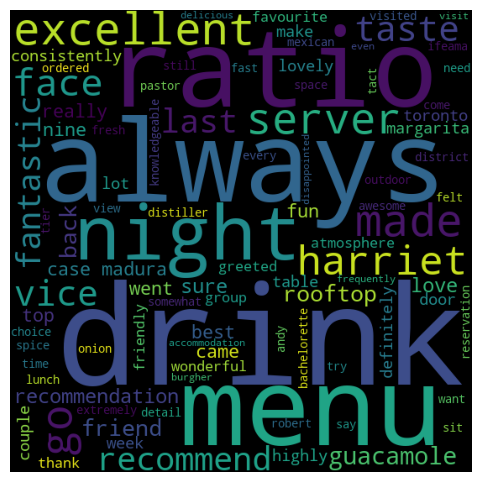

In [119]:
c1 =' '.join(cluster1)
word_cloud(c1)

__Wordcloud for review 15__

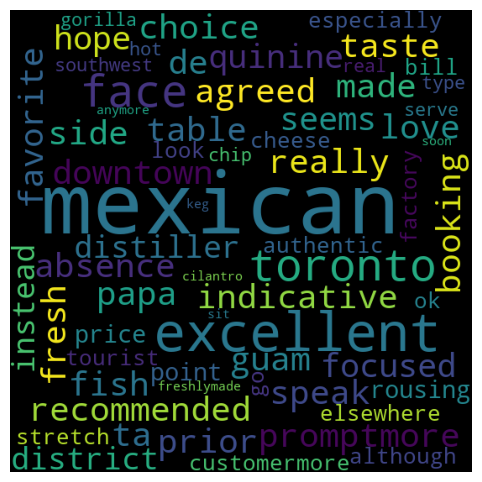

In [120]:
c15 = ' '.join(cluster15)
word_cloud(c15)

__Reviews for cluster 1__

In [121]:
for i in range(2):
    print('Review: ', cluster1[i])

Review:  time lunch always consistently want make reservation friday night lucky arriving pm last undeserved table usualmore filipino
Review:  excellent came fast everything tasted excellent location highly recommend sitting rooftop ratio day tip make reservation rooftop ratio view


__Reviews for cluster 15__

In [122]:
for i in range(1):
    print('Review: ', cluster15[i])

Review:  love mexican agreed favorite mexican ta guam made table side fresh taste fish face speak face de papa excellent there excellent mexican


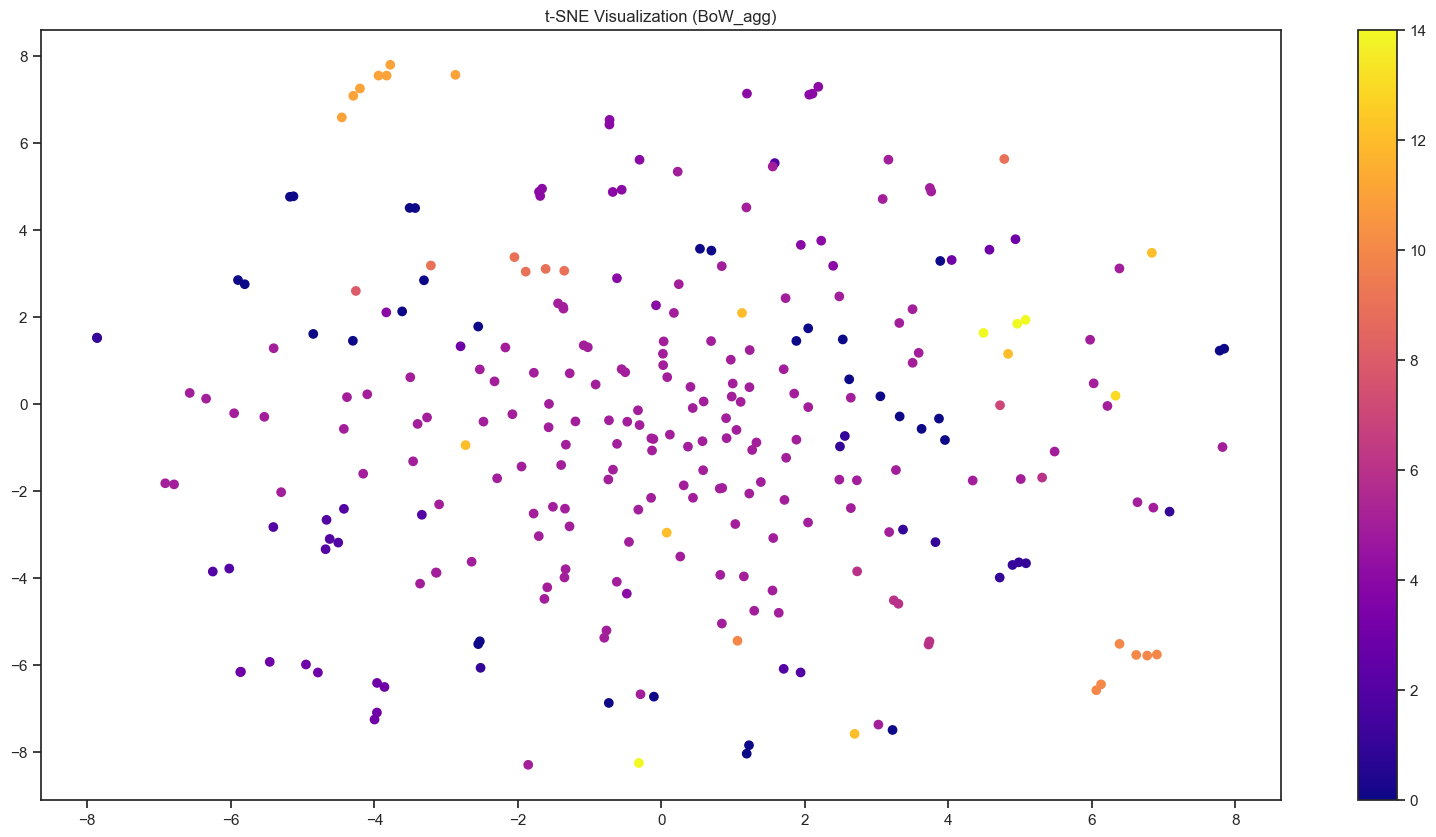

In [123]:
tsne_results = tsne.fit_transform(bow)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agg_bow.labels_, cmap='plasma')
plt.title('t-SNE Visualization (BoW_agg)')
plt.colorbar()
plt.show()

In [124]:
silhouette_score_agg_bow = silhouette_score(bow, agg_bow.labels_)
print("Silhouette Score (BoW_agg):", silhouette_score_agg_bow)

Silhouette Score (BoW_agg): 0.06069685008829494


## Silhouette Score Analysis
### Bag of Words (BoW) Representation
- **Silhouette Score (BoW_agg):** 0.06069685008829494
  - **Interpretation:** The Silhouette Score for the clustering obtained using Hierarchical Clustering (AgglomerativeClustering) on Bag of Words (BoW) representation is approximately 0.061.
  - **Explanation:** 
    - A Silhouette Score ranges from -1 to 1.
    - Values close to 1 indicate that the clusters are well-separated.
    - Values close to 0 suggest overlapping clusters.
    - Negative values indicate that data points have been assigned to the wrong cluster.
  - **Evaluation:** 
    - A score of 0.061 is relatively low, suggesting that the clusters are not well-separated.
    - It indicates that there might be some overlap between clusters or that the clustering algorithm did not perform optimally.

# TF-IDF (Term Frequency-Inverse Document Frequency)

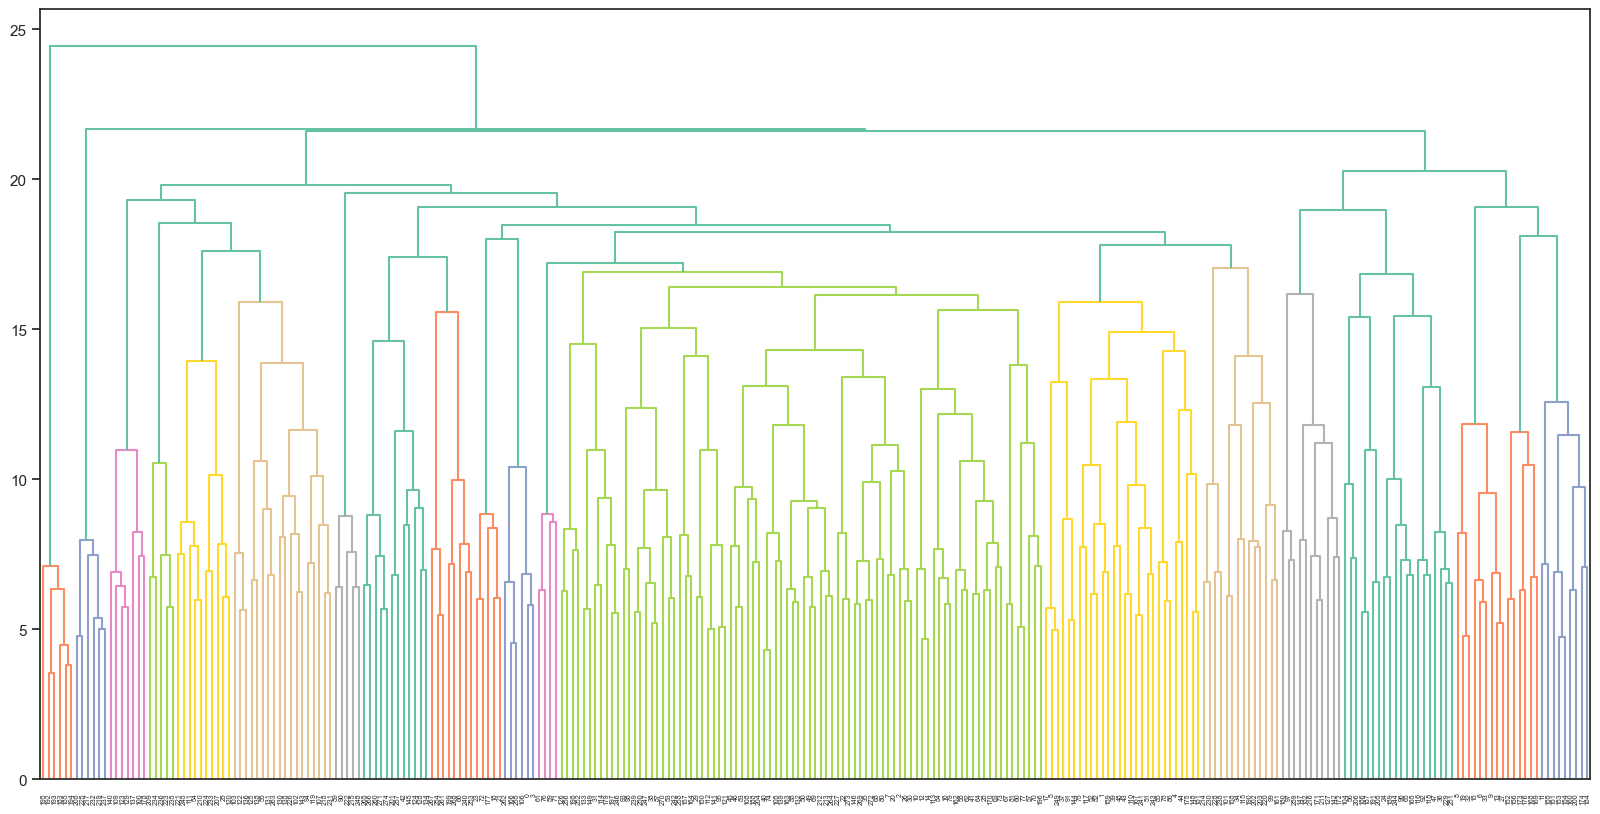

In [125]:
dendro=hierarchy.dendrogram(hierarchy.linkage(tfidf,method='ward'))

In [126]:
agg_tfidf = AgglomerativeClustering(n_clusters=15)
agg_tfidf.fit(tfidf)

AgglomerativeClustering(n_clusters=15)

In [127]:
agg_tfidf.labels_

array([ 0,  1,  2,  0,  1,  1,  9,  2,  9,  9,  2,  6,  2,  9,  2,  9,  2,
        1,  0,  9,  2,  0,  2,  0,  5,  4,  2,  9,  2,  2,  2,  2,  9,  9,
        1,  2,  5,  1,  2,  1,  2,  2,  3,  1,  1,  2,  2,  5,  1,  2,  2,
        1,  1,  2,  4,  4,  5,  2,  2,  2,  2,  2,  2,  2,  2,  5,  3,  2,
        2,  2,  2,  2,  0,  2,  2,  1,  2,  2,  1,  2,  2,  2,  1,  2,  2,
        1,  1,  2,  2, 13, 13,  1,  5,  2,  4,  2,  5, 10,  2,  1,  8,  1,
        4,  4,  5,  2,  0,  4,  2,  8,  1,  4,  2,  2,  2,  1,  5,  1,  5,
        4,  4,  2,  4,  8,  3,  4,  2, 10,  3,  8,  4,  4,  2,  2,  3,  4,
        4,  8,  4,  2,  8,  2, 10,  4,  1,  3,  2, 10,  1,  2,  2,  6, 14,
        6,  6,  6, 14,  2,  1,  1,  6,  1,  2,  2,  2,  5,  0,  1, 14, 14,
        2, 10, 10, 14,  6,  1, 14,  0,  8,  2, 10,  1, 10,  7,  6,  7,  5,
        5,  2,  5,  1,  5,  7,  7,  7,  7,  2,  2,  2,  3,  6,  3,  1,  1,
        2,  5,  5,  4, 11, 12,  4, 10,  2,  2,  1, 13, 10, 11,  4, 11,  1,
        4, 13, 12,  4, 11

In [128]:
# taking all the reviews in first and the last cluster
cluster1 = []
cluster15 = []

for i in range(agg_tfidf.labels_.shape[0]):
    if agg_tfidf.labels_[i] == 0:
        cluster1.append(y[i])
    elif agg_tfidf.labels_[i] == 14:
        cluster15.append(y[i])
    else :
        pass

In [129]:
# Number of reviews 
print("No. of reviews in Cluster-1 : ",len(cluster1))
print("\nNo. of reviews in Cluster-15 : ",len(cluster15))

No. of reviews in Cluster-1 :  11

No. of reviews in Cluster-15 :  6


__Reviews for cluster 1__

In [130]:
for i in range(2):
    print('Review: ', cluster1[i])

Review:  price high enough portion unbelievably small serving plate overlie give impression big order taste questionable late maybe new cook portion small
Review:  taste found portion small given amount money paid comb lot plus side lumen freemore mummy


__Reviews for cluster 15__

In [131]:
for i in range(2):
    print('Review: ', cluster15[i])

Review:  birthday case madura girlfriend daughter fantastic top notch robert excellent host server definitely enhanced back birthday
Review:  lovely bachelorette celebration case madura vice entertainment top notch really made excellent server robert attention detail recommendation wonderful phenomenon bachelorette


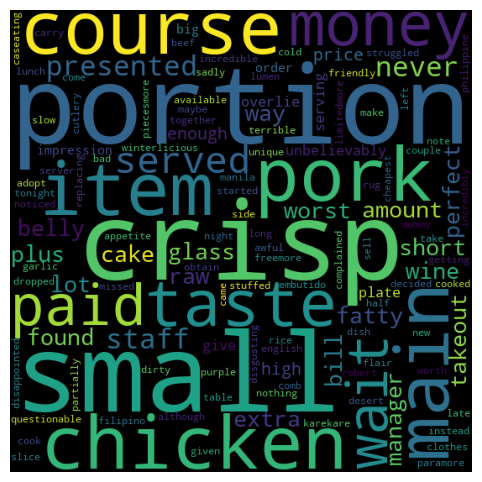

In [132]:
# Wordcloud for review 1
c1 =' '.join(cluster1)
word_cloud(c1)

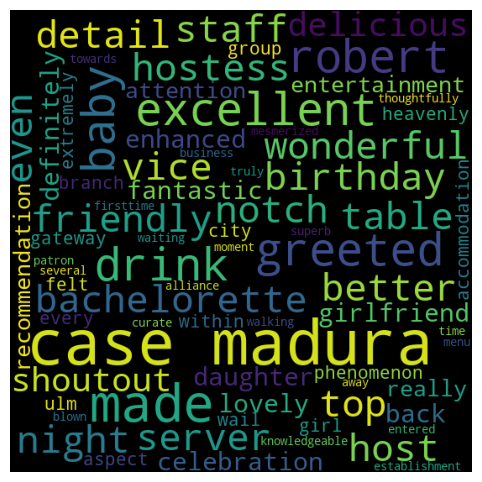

In [133]:
# Wordcloud for review 15
c15 = ' '.join(cluster15)
word_cloud(c15)

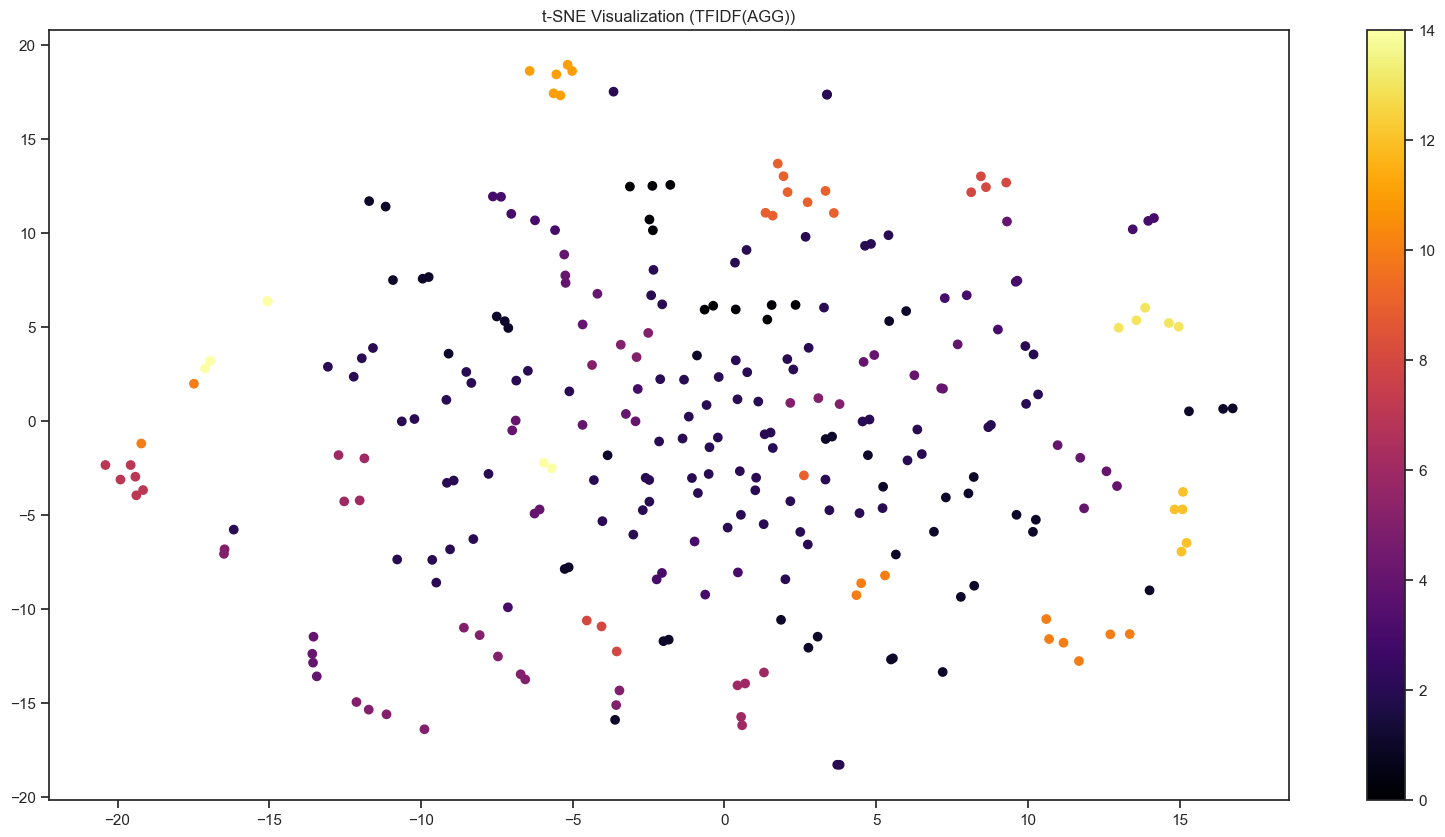

In [134]:
tsne_results = tsne.fit_transform(tfidf)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=agg_tfidf.labels_, cmap='inferno')
plt.title('t-SNE Visualization (TFIDF(AGG))')
plt.colorbar()
plt.show()

In [135]:
silhouette_score_agg_tfidf = silhouette_score(tfidf, agg_tfidf.labels_)
print("Silhouette Score (TFIDF_agg):", silhouette_score_agg_tfidf)

Silhouette Score (TFIDF_agg): 0.05567670374544527


##Silhouette Score Analysis
### TF-IDF Representation
- **Silhouette Score (TFIDF_agg):** 0.05567670374544527
  - **Interpretation:** The Silhouette Score for the clustering obtained using Hierarchical Clustering (AgglomerativeClustering) on TF-IDF representation is approximately 0.056.
  - **Explanation:** 
    - Similar to the previous score, this one also ranges from -1 to 1.
    - Higher values indicate better separation between clusters.
  - **Evaluation:** 
    - A score of 0.056 is slightly lower than the BoW score.
    - It suggests that the clusters might be slightly less well-separated compared to the BoW representation.
    - However, it's still a relatively low score, indicating that there is room for improvement in the clustering results.
